In [4]:
import pandas as pd
year = 2023
df = pd.read_csv(f'./dataset/CARD_{year}.csv', encoding = 'euc-kr')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64829377 entries, 0 to 64829376
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   거래년월      int64 
 1   고객ID      int64 
 2   가맹점업종명    object
 3   가맹점_광역시도  object
 4   가맹점_시군구   object
 5   승인건수      object
 6   승인금액      int64 
dtypes: int64(3), object(4)
memory usage: 3.4+ GB


In [6]:
df['거래년월'] = pd.to_datetime(df['거래년월'], format='%Y%m').dt.to_period('M')
df = df.drop(columns=['가맹점_광역시도', '가맹점_시군구'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64829377 entries, 0 to 64829376
Data columns (total 5 columns):
 #   Column  Dtype    
---  ------  -----    
 0   거래년월    period[M]
 1   고객ID    int64    
 2   가맹점업종명  object   
 3   승인건수    object   
 4   승인금액    int64    
dtypes: int64(2), object(2), period[M](1)
memory usage: 2.4+ GB


In [8]:
df['승인건수'] = df['승인건수'].replace({
    '5번이하': 1,
    '5번초과 10번이하': 2,
    '10번초과 15번이하': 3,
    '15번초과 20번이하': 4,
    '20번 초과': 5
})


df['승인건수'].unique()

C:\Users\dndtn\AppData\Local\Temp\ipykernel_2796\3363579264.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['승인건수'] = df['승인건수'].replace({


array([1, 3, 2, 5, 4])

In [9]:
df.head()

,거래년월,고객ID,가맹점업종명,승인건수,승인금액
0,2023-12,3557388137,일반한식,1,20000
1,2023-12,3557255233,일반한식,1,10000
2,2023-12,3474259363,일반한식,1,20000
3,2023-12,3698202806,일반한식,1,30000
4,2023-12,7676586511,자동차정비,1,100000


In [10]:
filtered_df = (
    df[df['승인건수'] == 3]
    .groupby('가맹점업종명')
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

filtered_df.head(30)

,가맹점업종명,count
165,편 의 점,106301
93,슈퍼마켓,87182
119,인터넷P/G,82252
86,서양음식,21594
158,택시,18602
118,인터넷Mall,17618
120,인터넷종합Mall,15843
38,기타레져업소,13221
59,대형할인점,13077
45,기타음료식품,12467


In [11]:
summary_df = pd.read_csv(f'./dataset/summary_{year}.csv', encoding='utf-8-sig')

summary_grouped = summary_df.groupby(['고객ID', '연령대', '이탈여부']).size().reset_index(name='연령대_고객수')

merged_df = pd.merge(df, summary_grouped[['고객ID', '연령대', '이탈여부']], on='고객ID', how='inner')

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63332330 entries, 0 to 63332329
Data columns (total 7 columns):
 #   Column  Dtype    
---  ------  -----    
 0   거래년월    period[M]
 1   고객ID    int64    
 2   가맹점업종명  object   
 3   승인건수    int64    
 4   승인금액    int64    
 5   연령대     object   
 6   이탈여부    object   
dtypes: int64(3), object(3), period[M](1)
memory usage: 3.3+ GB


In [13]:
merged_df.isnull().sum()

거래년월      0
고객ID      0
가맹점업종명    0
승인건수      0
승인금액      0
연령대       0
이탈여부      0
dtype: int64

In [14]:
merged_df.tail()

,거래년월,고객ID,가맹점업종명,승인건수,승인금액,연령대,이탈여부
63332325,2023-01,7210942935,일식·회집,1,50000,50대,유지
63332326,2023-01,3857466791,일식·회집,1,20000,50대,유지
63332327,2023-01,4075163762,일식·회집,1,40000,20대,이탈
63332328,2023-01,2956984953,일식·회집,1,10000,20대,유지
63332329,2023-01,8345799655,스넥,1,20000,50대,유지


In [15]:
filtered_df = merged_df[merged_df['연령대'].isin(['20대', '30대'])]

In [16]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18363147 entries, 0 to 63332328
Data columns (total 7 columns):
 #   Column  Dtype    
---  ------  -----    
 0   거래년월    period[M]
 1   고객ID    int64    
 2   가맹점업종명  object   
 3   승인건수    int64    
 4   승인금액    int64    
 5   연령대     object   
 6   이탈여부    object   
dtypes: int64(3), object(3), period[M](1)
memory usage: 1.1+ GB


In [17]:
unique_values = filtered_df['가맹점업종명'].unique()

In [18]:
unique_values

array(['일반한식', '기타레져업소', '중국식', '주점', 'SK주유소', '정육점', '스넥', '미용원',
       '기타음료식품', '슈퍼마켓', '쌍용S-OIL', '스포츠·레져용품', '기타숙박업', '제과점', '유아원',
       '편 의 점', '철도', '페인트', '기계공구', '세탁소', '의 원', '농,축협직영매장', '사우나',
       '서양음식', '티켓', '농·축·수산품', 'SK가스충전소', '렌터카', '인터넷Mall', '약 국',
       '피부미용실', '한 의 원', '주유소', '유흥주점', '정장', '인터넷P/G', '안경', '화물운송',
       'GS주유소', '항공사', '자동차부품', '가전제품', '치과의원', '당구장', '기타건축자재', '일식·회집',
       '골프경기장', '주차장', '주방용구', '전문서적', '특급호텔', '문구용품', '기타잡화', '옷감·직물',
       '자사카드발행백화점', '일반가구', '동물병원', '화원', '병 원(응급실운영)', '1급 호텔', '농기계',
       '예·체능계학원', '화장품', '보습학원', '세차장', '대형할인점', '컴퓨터', '기타의류', '노 래 방',
       '스크린골프', '위탁급식업', '종합병원', '기념품점', '비료,사료,종자', '목재·석재·철물', '일반서적',
       '보일러·펌프·샷시', '미용재료', '액세서리', '신 발', '자동차시트·타이어', '단란주점', '손해보험',
       '영화관', '현대정유(오일뱅크)', '종합용역', '골프용품 전문점', '기타가구', '가타자동차서비스',
       '기타 교육기관', '비씨카드 정산용가맹점', '미곡상', '완구점', '구내매점(국가기관등)', '아동의류',
       '이용원', '사무서비스', '출판 및 인쇄물', '애완동물', '통신기기', '조세서비스', '현대정유가스충전소',
       

In [19]:
category_map = {
    # 음식/음료 관련 업종
    '음식/음료 관련 업종': [
        '슈퍼마켓', '스넥', '제과점', '서양음식', '정육점', '기타음료식품', '일반한식', '농·축·수산품', 
        '일식·회집', '중국식', '위탁급식업', '농협하나로클럽', '농축수산가공품', '연 쇄 점', '주류판매점', 
        '한정식', '갈비전문점', '편 의 점', '대형할인점', '구내매점(국가기관등)', '농,축협직영매장'
    ],
    # 패션 및 의류
    '패션 및 의류': [
        '액세서리', '귀금속', '안경', '정장', '세탁소', '아동의류', '스포츠의류', '내의판매', '신 발', 
        '기타의류', '가 방', '옷감·직물', '단체복', '제 화'
    ],
    # 헬스케어/병원
    '헬스케어/병원': [
        '한 의 원', '의 원', '약 국', '치과병원', '헬스클럽', '수 영 장', '치과의원', '병 원(응급실운영)', 
        '의료용품', '기타건강식품', '홍삼제품', '종합병원', '기타의료기관 및 기타의료기기', '한방병원', '인삼제품', 
        '한약방', '건강진단', '동물병원', '애완동물'
    ],
    # 미용
    '미용': [
        '미용원', '화장품', '피부미용실', '미용재료'
    ],
    # 자동차 관련
    '자동차 관련': [
        'GS주유소', '화물운송', 'SK주유소', '현대정유(오일뱅크)', '주유소', '쌍용S-OIL', '현대정유가스충전소', 
        '주차장', 'E1가스충전소', 'GS가스충전소', '자동차시트·타이어', 'SK가스충전소', '자동차정비', '가타자동차서비스', 
        '자동차부품', '쌍용S-OIL가스충전소', '세차장', '전기차충전소', '카인테리어', '이륜차판매', '윤활유전문판매'
    ],
    # 교통
    '교통': [
        '철도', '고속버스', '렌터카', '택시', '항공사', '택시회사'
    ],
    # 홈 및 가전
    '홈 및 가전': [
        '컴퓨터', '통신기기', '기타가구', '가전제품', '보일러·펌프·샷시', '기타전기제품', '일반가구', '조명기구', 
        '침구·수예점', '안마/스포츠마사지', '주방용식기', '주방용구'
    ],
    # 레저 및 스포츠
    '레저 및 스포츠': [
        '기타레져업소', '레져업소', '종합레져타운', '골프경기장', '골프연습장', '골프용품 전문점', '스크린골프'
    ],
    # 교육 및 학원 관련
    '교육 및 학원 관련': [
        '예·체능계학원', '독서실', '일반서적', '보습학원', '기타 교육기관', '기능학원', '학습지교육', '학원', 
        '전문서적', '외국어학원', '문구용품', '완구점', '화방·표구점', '기타서적문구', '출판 및 인쇄물', 'DP&E', 
        '기타 사무용품'
    ],
    # 숙박/여행 관련
    '숙박/여행 관련': [
        '특급호텔', '기타숙박업', '콘도', '1급 호텔', '2급 호텔', '관광여행', '여객선'
    ],
    # 문화생활 (문화+술집)
    '문화생활': [
        '티켓', '단란주점', '영화관', '유흥주점', '주점', '문화취미기타', '당구장', '볼 링 장', '노 래 방', 
        '칵테일바', '수족관', '사우나'
    ],
    # 금융 및 보험 관련 업종
    '금융 및 보험 관련 업종': [
        '손해보험', '기타보험', '생명보험', '공공요금대행서비스/소득공제대상', '조세서비스'
    ],
    # 육아/결혼
    '육아/결혼': [
        '유아원', '초중고교육기관'
    ],
    # 기타 업종
    '기타 업종': [
        '기계공구', '자사카드발행백화점', '기타 전문점', '기타잡화', '이동통신요금', '기타대인서비스', '비영리/대상', 
        '화원', '비영리/비대상', '기타4', '종합용역', '업종미등록', '가례서비스업', '소프트웨어', '가정용품수리', 
        '통신서비스/소득공제비대상', '위성방송', '사무서비스', '정수기', '기타용역서비스', '비씨카드 정산용(할인)', 
        '기타1', '비씨카드 정산용가맹점', '사무·통신기기수리', '민예·공예품', '통신판매업1', 'CATV', '기타유통업', 
        '보관및 창고업', '미곡상', '비료,사료,종자', '농기계', '기타수리서비스', '사무용 OA기기', '기타농업관련', 
        '시 계'
    ],
    # 쇼핑
    '쇼핑': [
        '인터넷Mall', '면 세 점', 'CATV홈쇼핑', '인터넷종합Mall', '전자상거래상품권전문판매', '상 품 권', 
        '일반(통신판매)', '기념품점', '유류판매', '인터넷P/G', 'PG상품권'
    ],
    # 인테리어 / 건축
    '인테리어 / 건축': [
        '인테리어전문', '페인트', '건축용 요업제품', '카페트,커튼,천막,지물', '목재·석재·철물', '기타건축자재'
    ]
}

def categorize_business_type(business_name):
    for category, names in category_map.items():
        if business_name in names:
            return category
    return '기타'  # 정의되지 않은 경우 '기타'로 분류

filtered_df1 = filtered_df.copy()
filtered_df1['업종카테고리'] = filtered_df['가맹점업종명'].apply(categorize_business_type)

In [20]:
filtered_df1[['가맹점업종명', '업종카테고리']].head()

,가맹점업종명,업종카테고리
0,일반한식,음식/음료 관련 업종
1,일반한식,음식/음료 관련 업종
2,일반한식,음식/음료 관련 업종
3,일반한식,음식/음료 관련 업종
19,일반한식,음식/음료 관련 업종


In [21]:
filtered_df1[['가맹점업종명', '업종카테고리']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 18363147 entries, 0 to 63332328
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   가맹점업종명  object
 1   업종카테고리  object
dtypes: object(2)
memory usage: 420.3+ MB


In [22]:
filtered_df1 = filtered_df1.drop(columns=['가맹점업종명'])

In [23]:
filtered_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18363147 entries, 0 to 63332328
Data columns (total 7 columns):
 #   Column  Dtype    
---  ------  -----    
 0   거래년월    period[M]
 1   고객ID    int64    
 2   승인건수    int64    
 3   승인금액    int64    
 4   연령대     object   
 5   이탈여부    object   
 6   업종카테고리  object   
dtypes: int64(3), object(3), period[M](1)
memory usage: 1.1+ GB


In [24]:
unique_values = filtered_df1['업종카테고리'].unique()

In [25]:
unique_values

array(['음식/음료 관련 업종', '레저 및 스포츠', '문화생활', '자동차 관련', '미용', '기타',
       '숙박/여행 관련', '육아/결혼', '교통', '인테리어 / 건축', '기타 업종', '패션 및 의류',
       '헬스케어/병원', '쇼핑', '홈 및 가전', '교육 및 학원 관련', '금융 및 보험 관련 업종'],
      dtype=object)

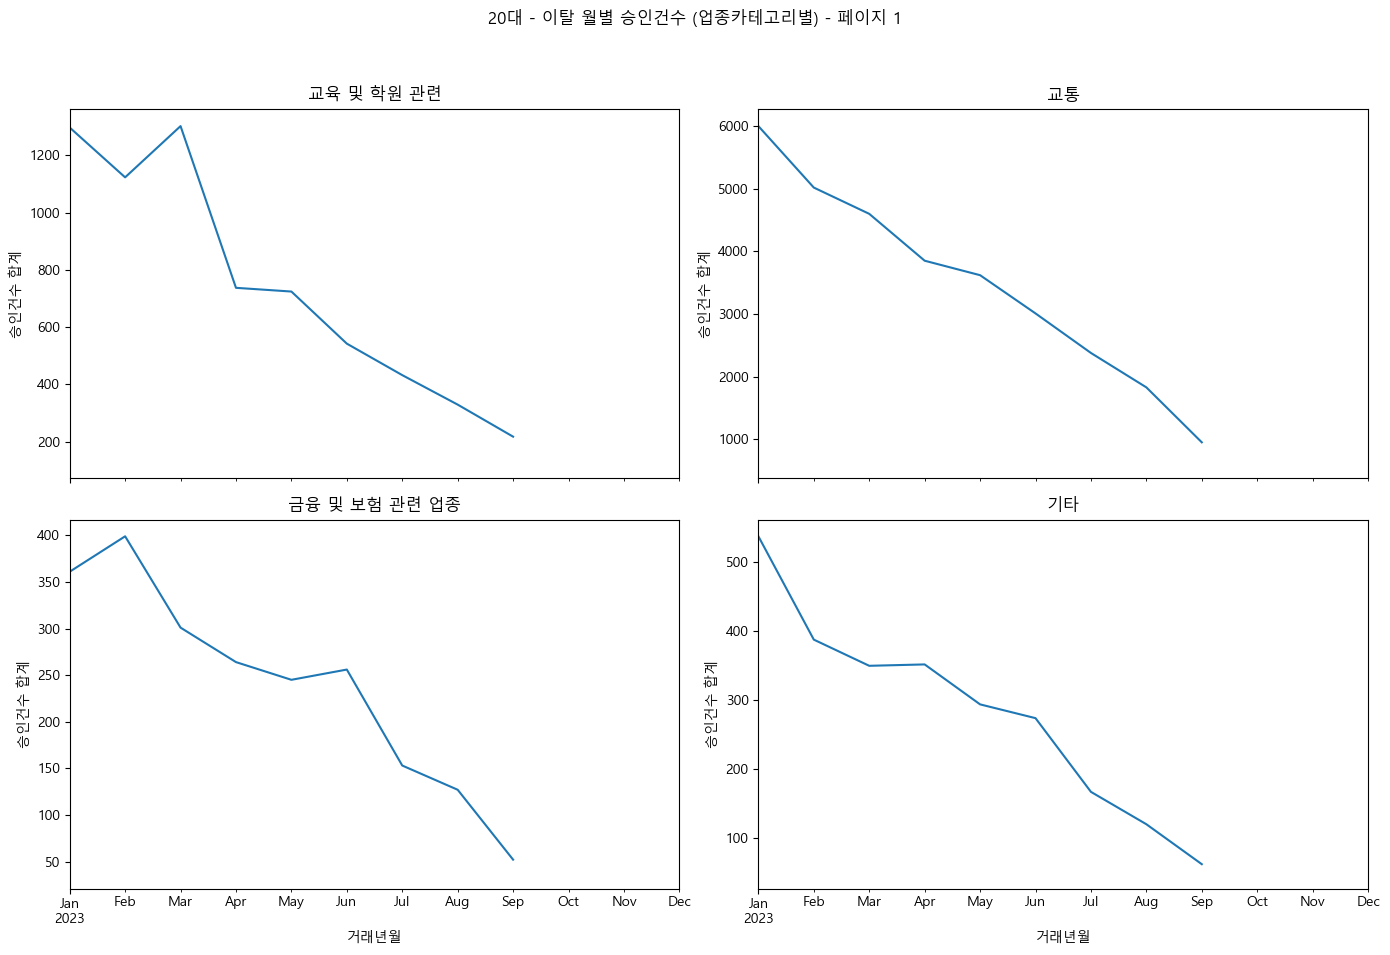

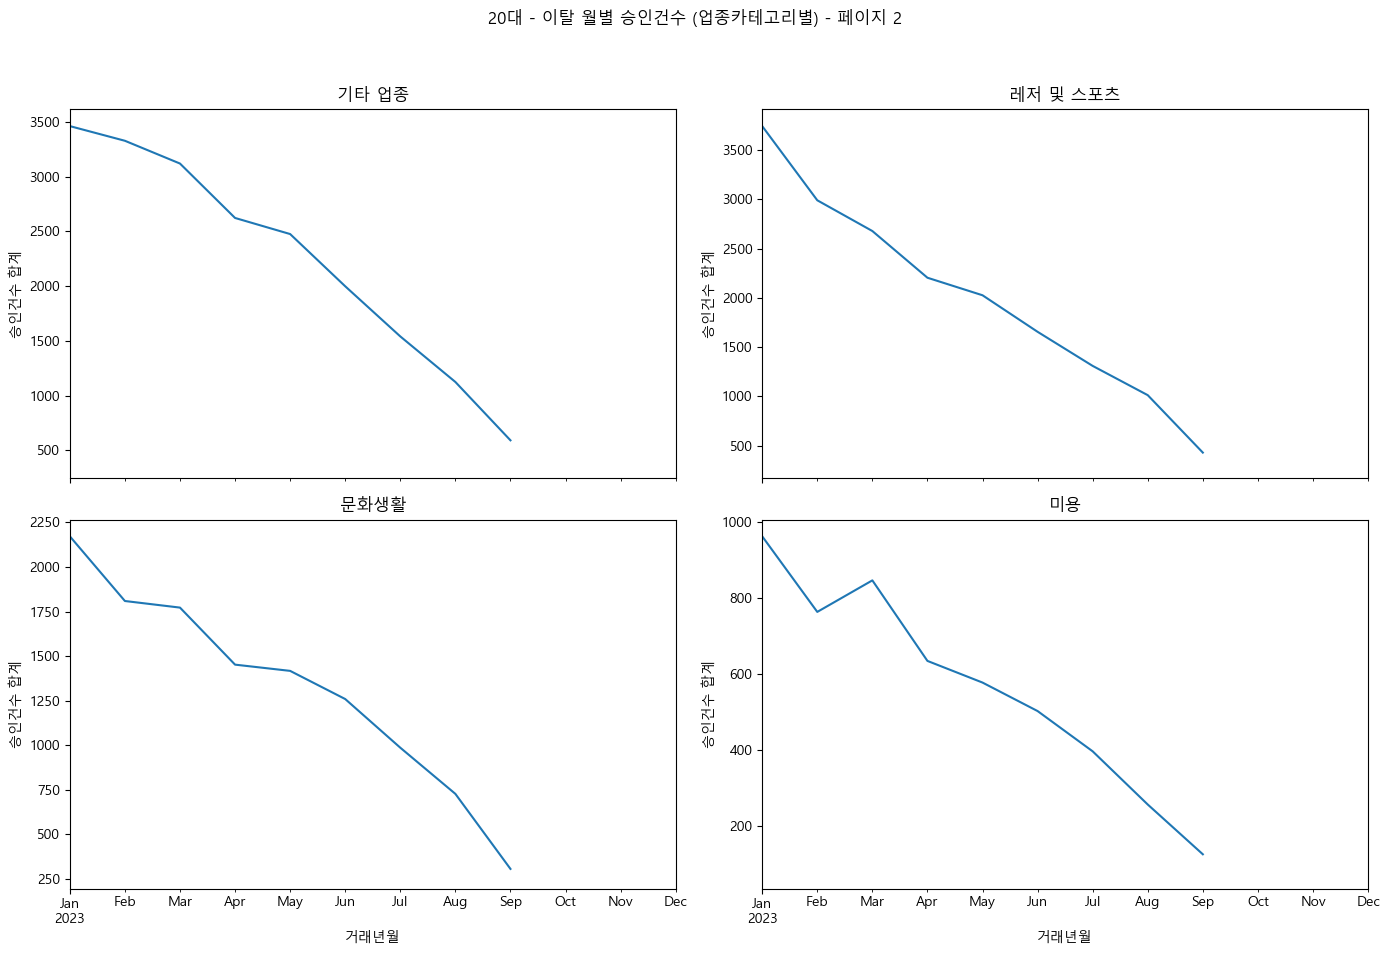

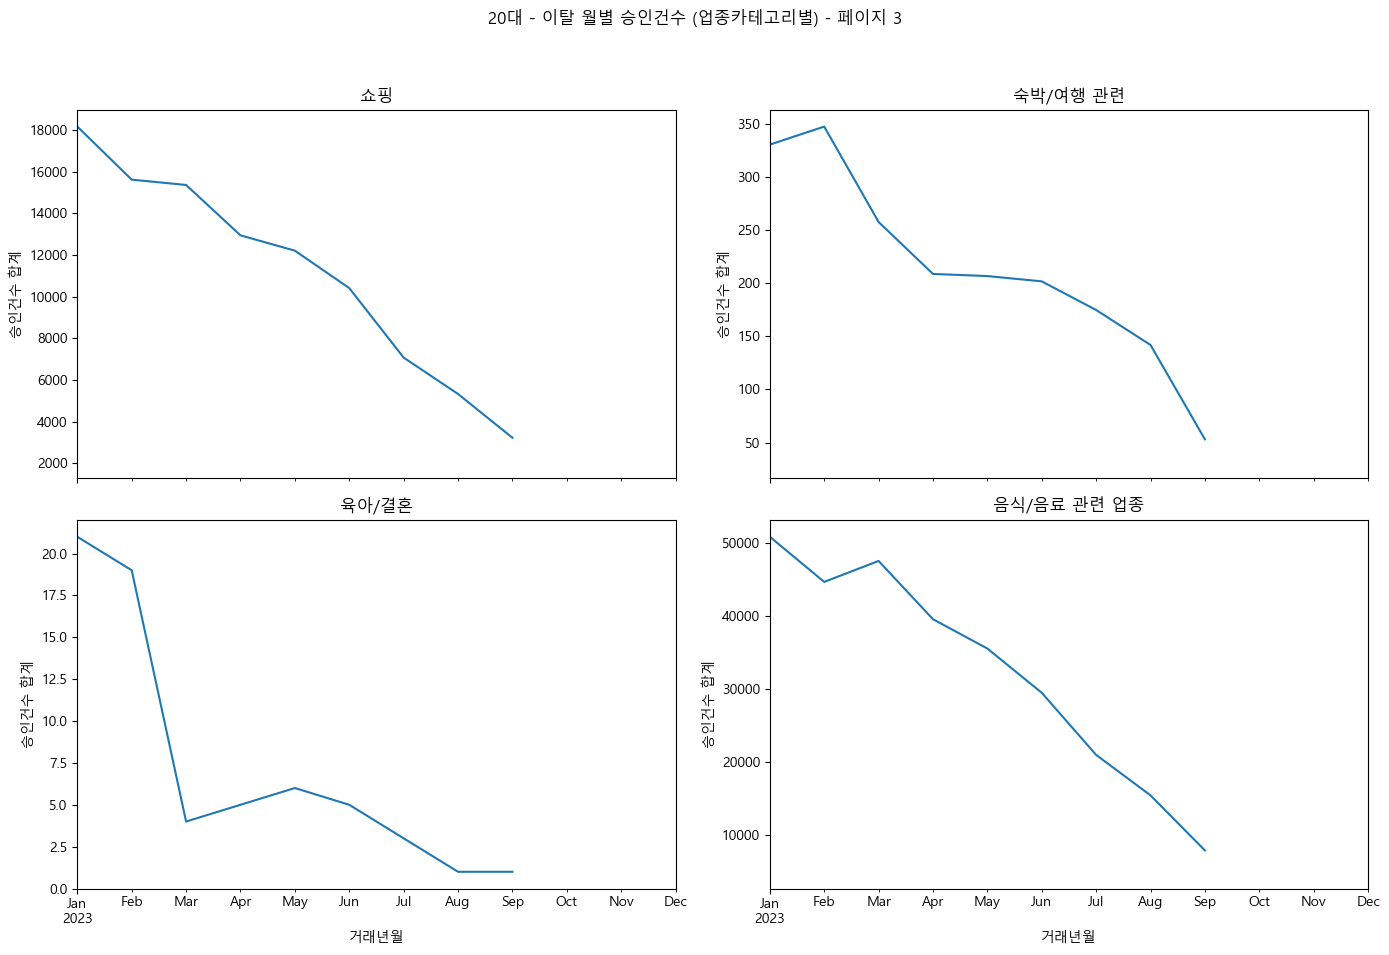

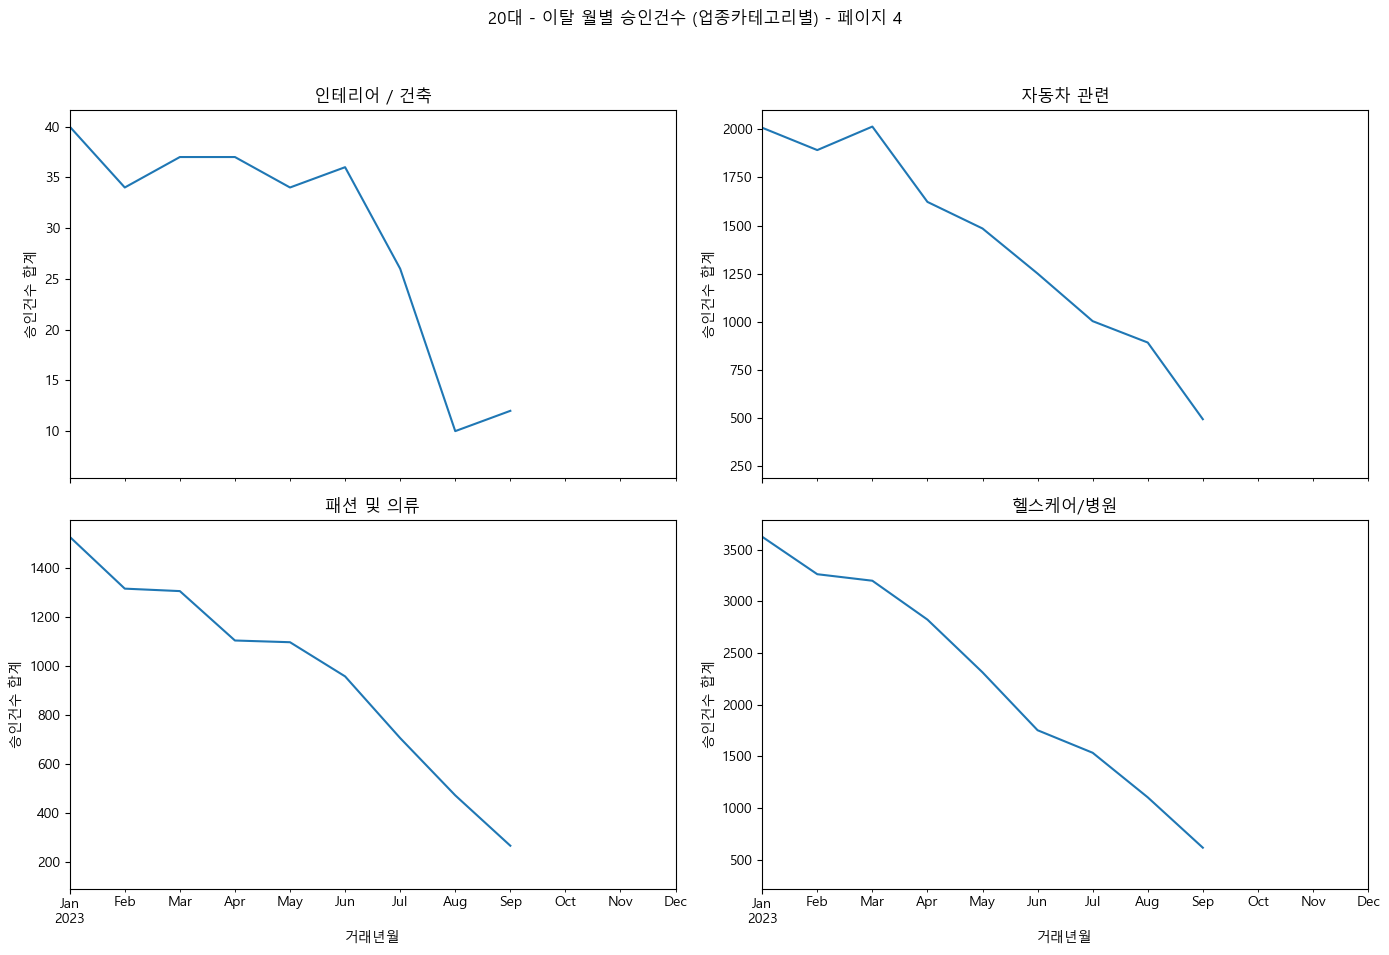

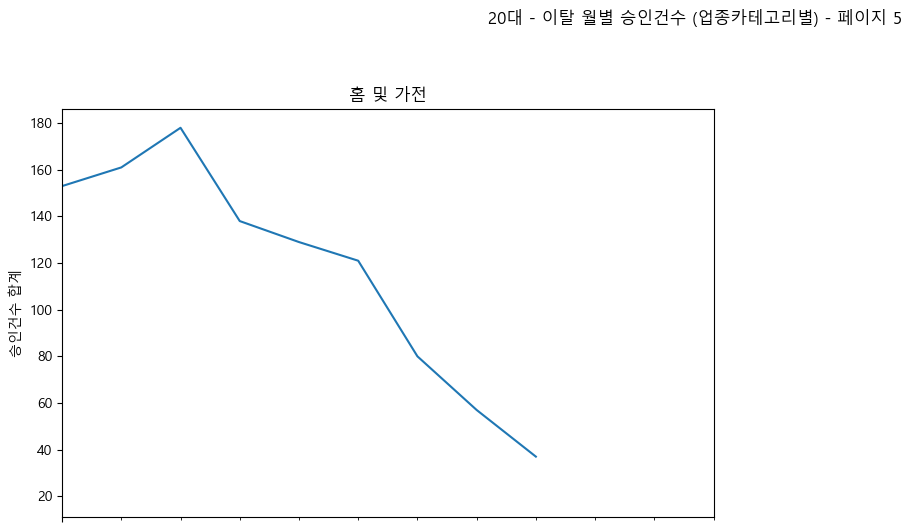

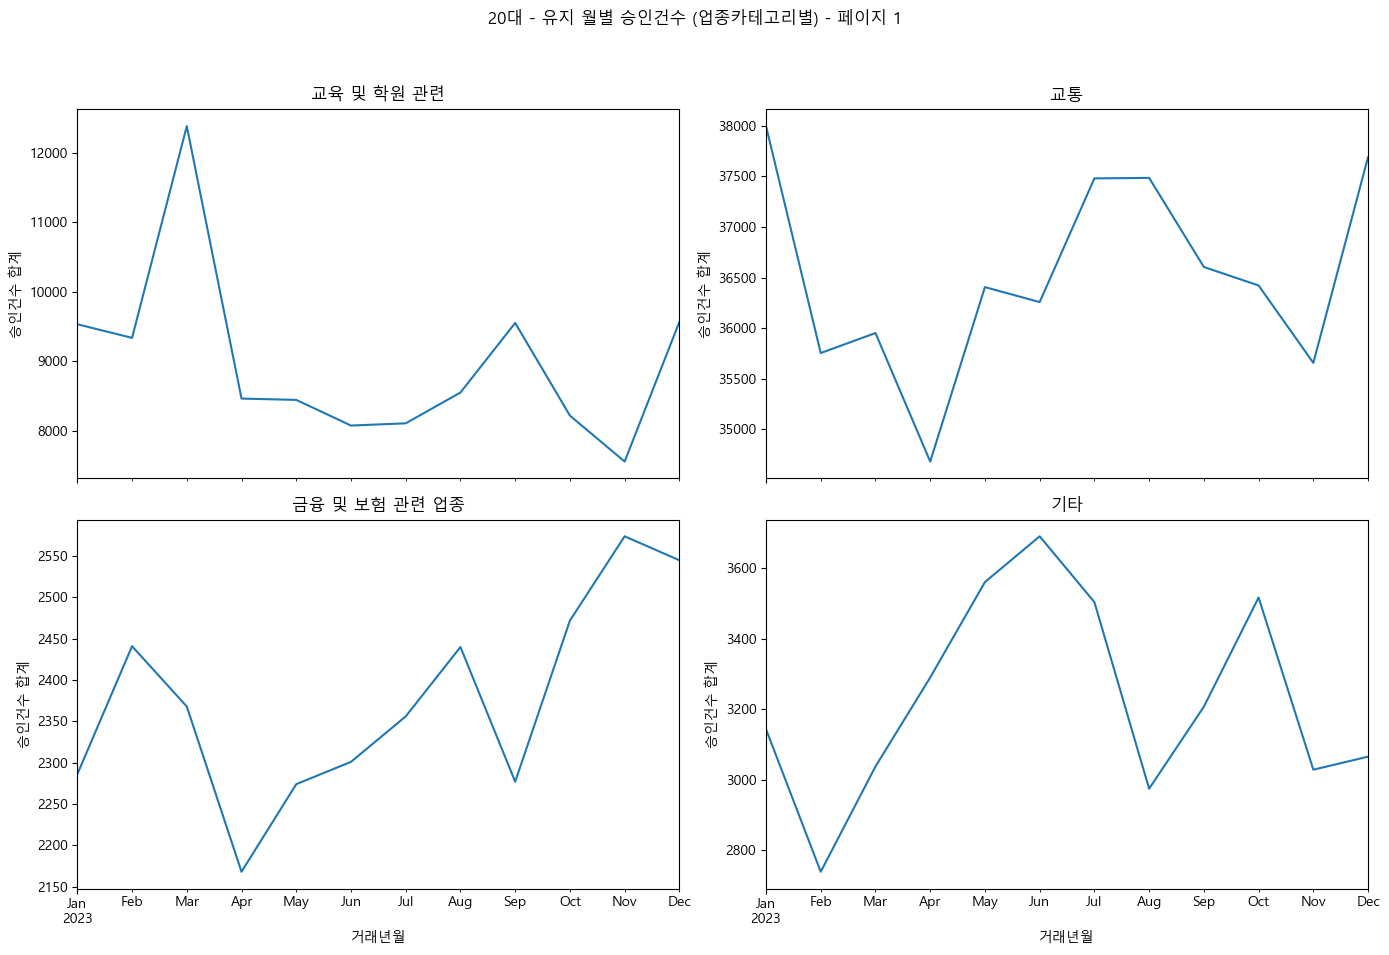

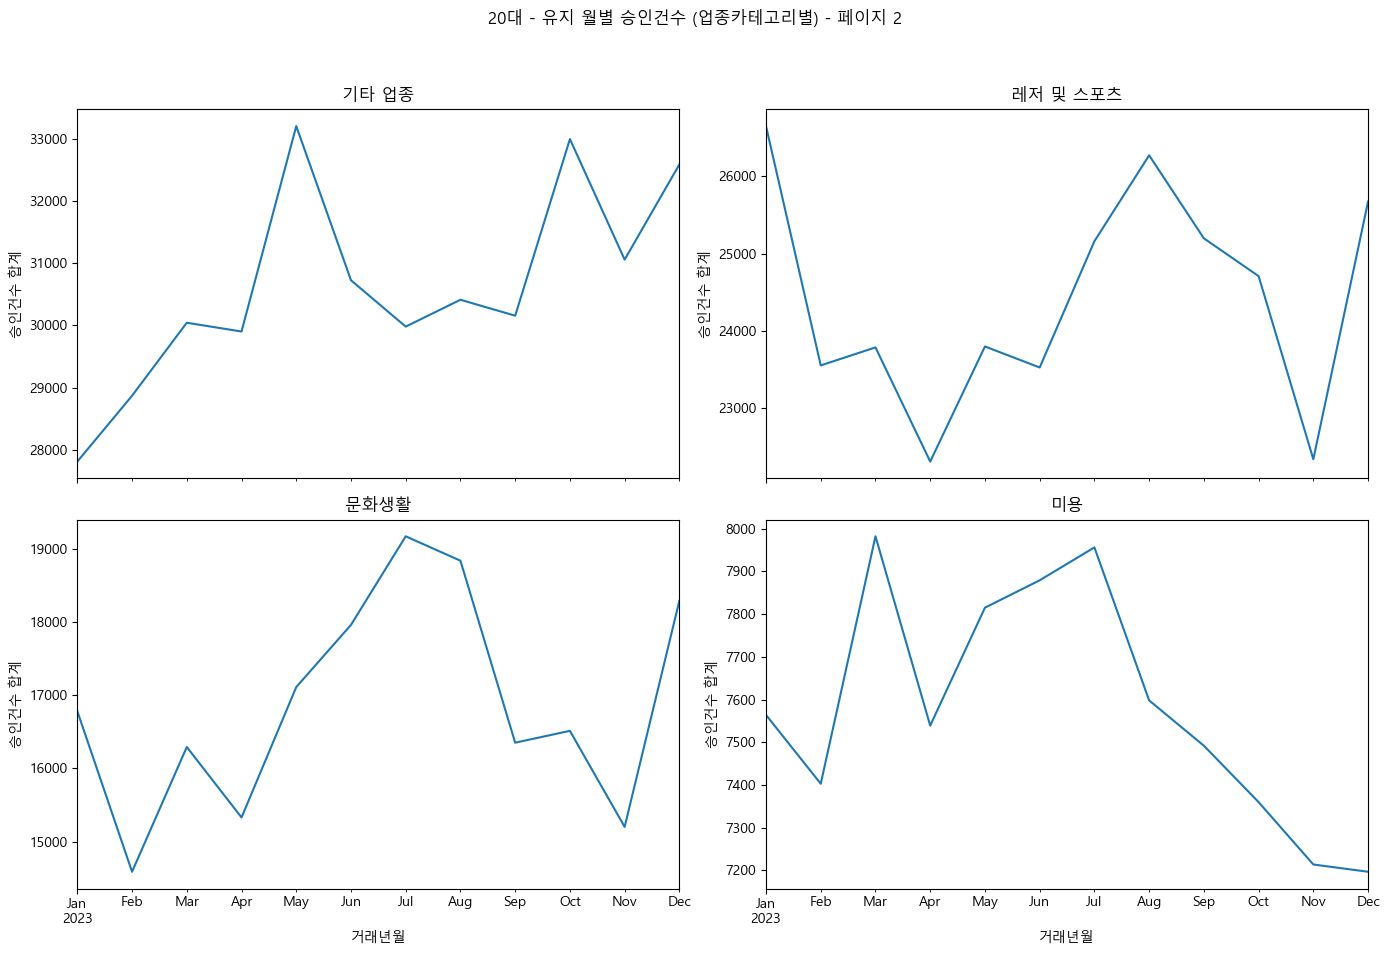

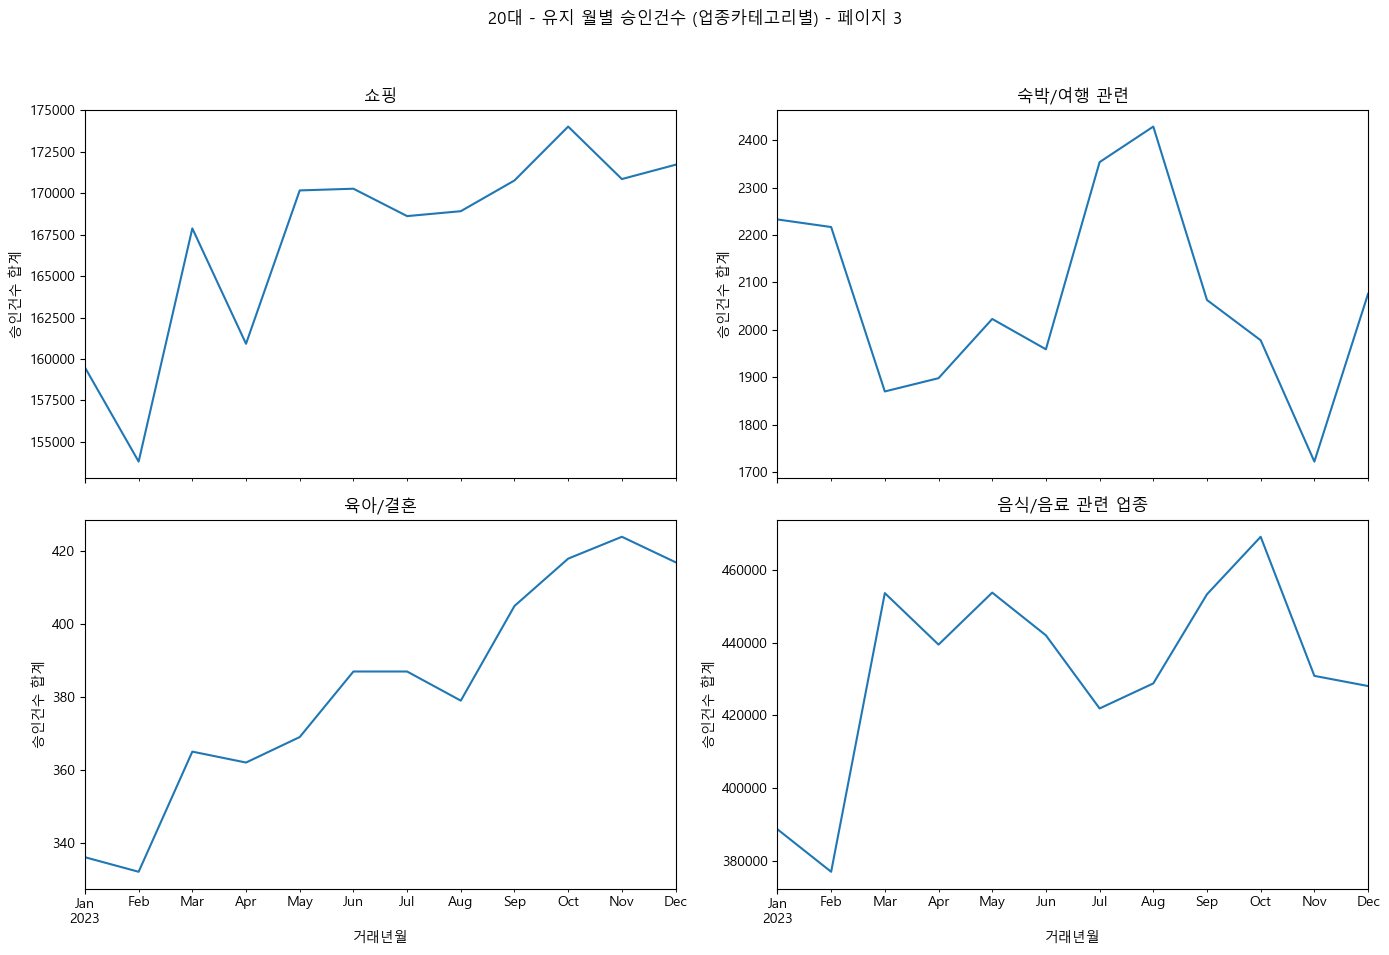

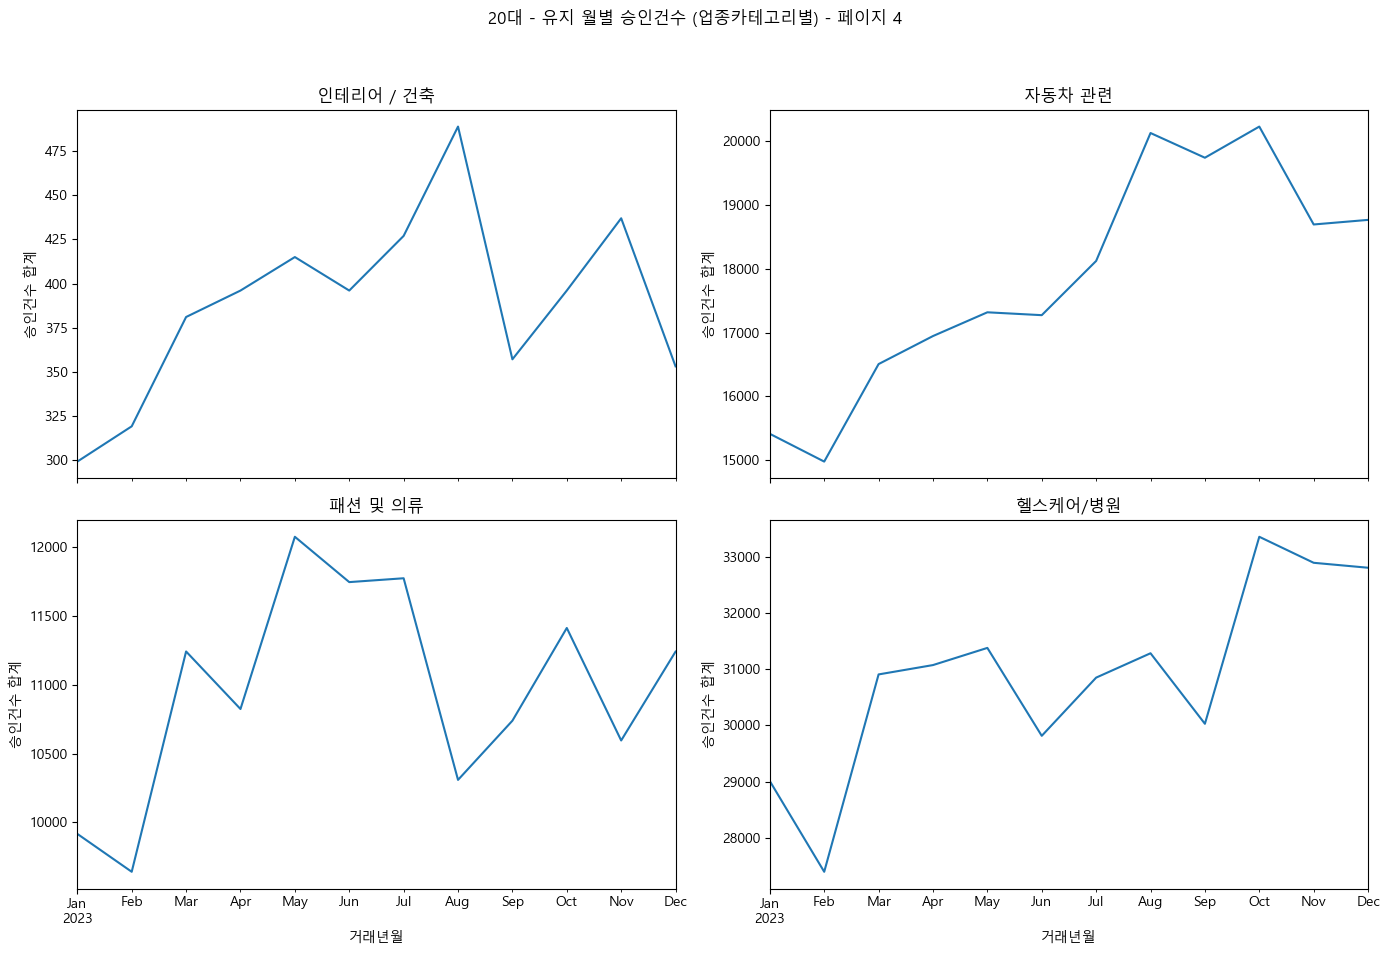

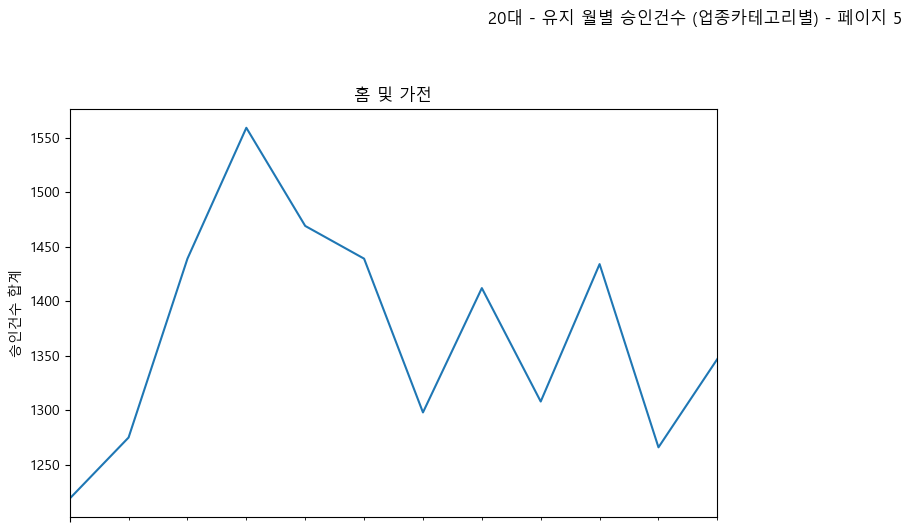

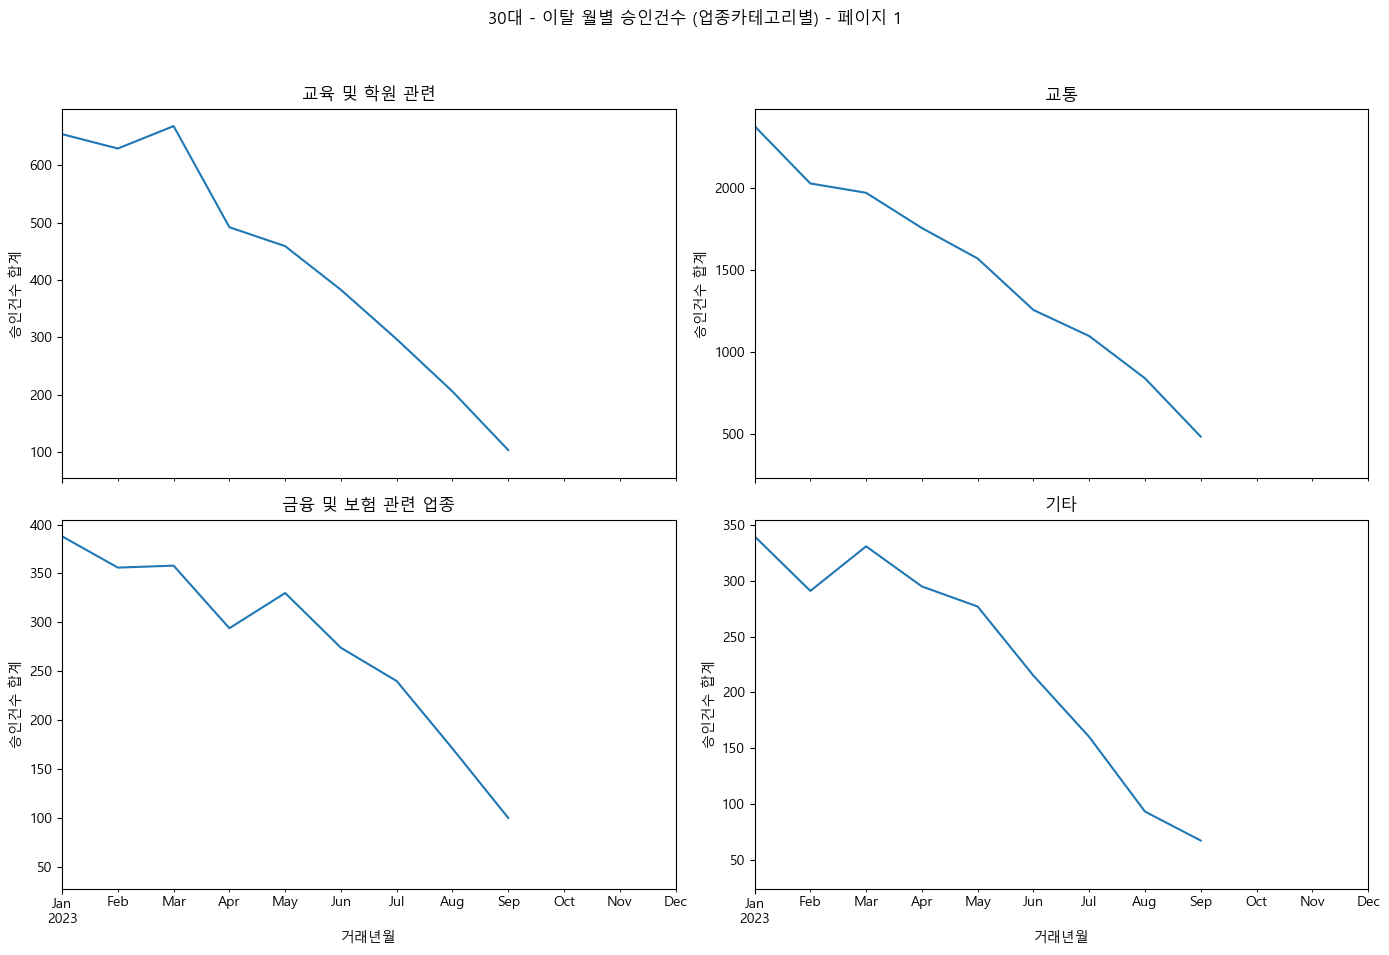

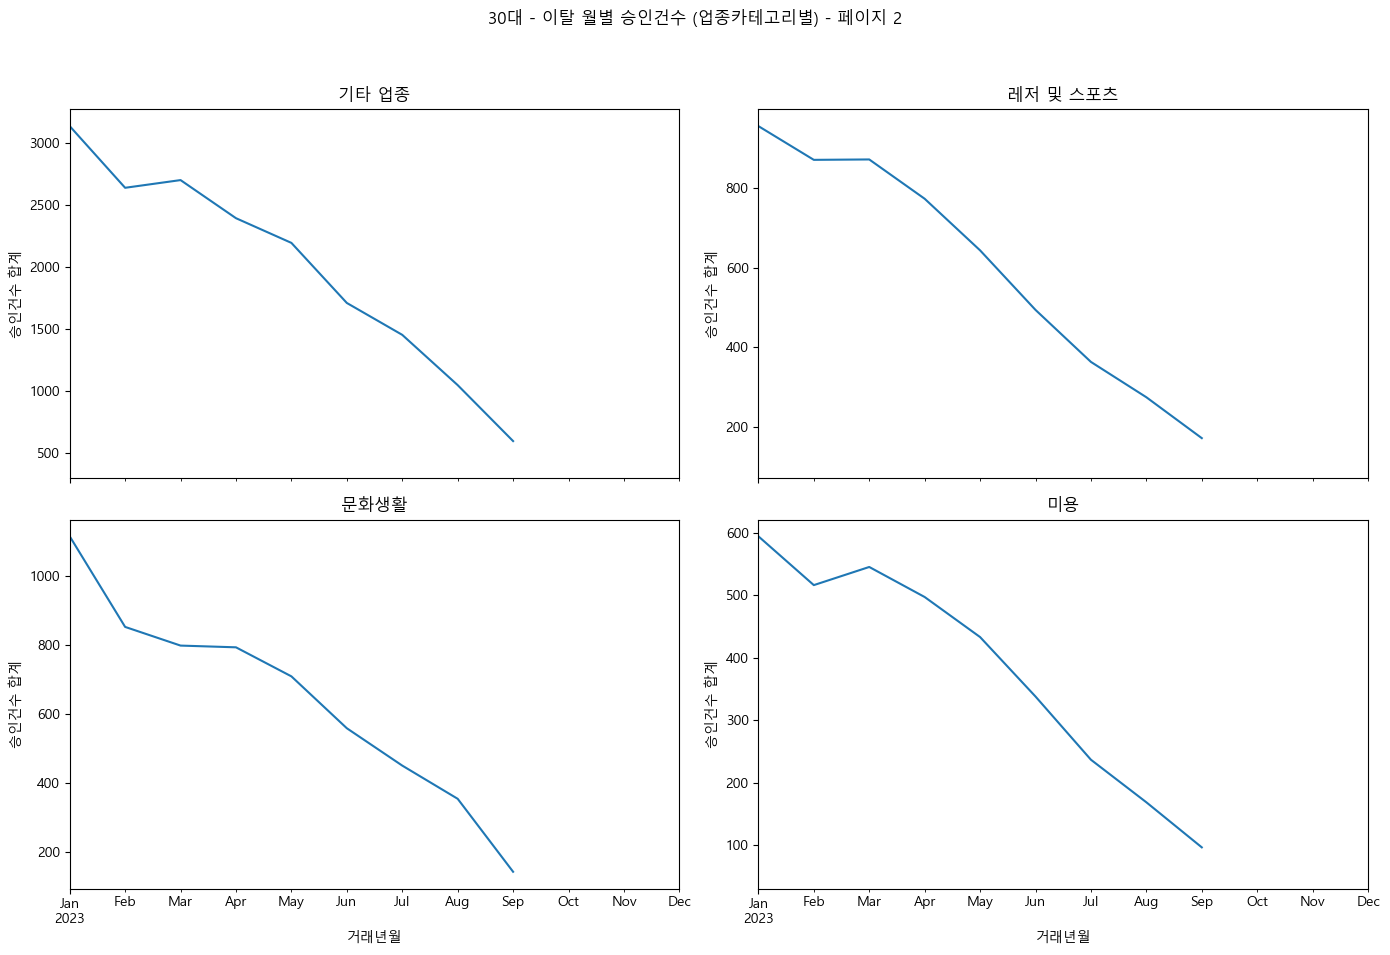

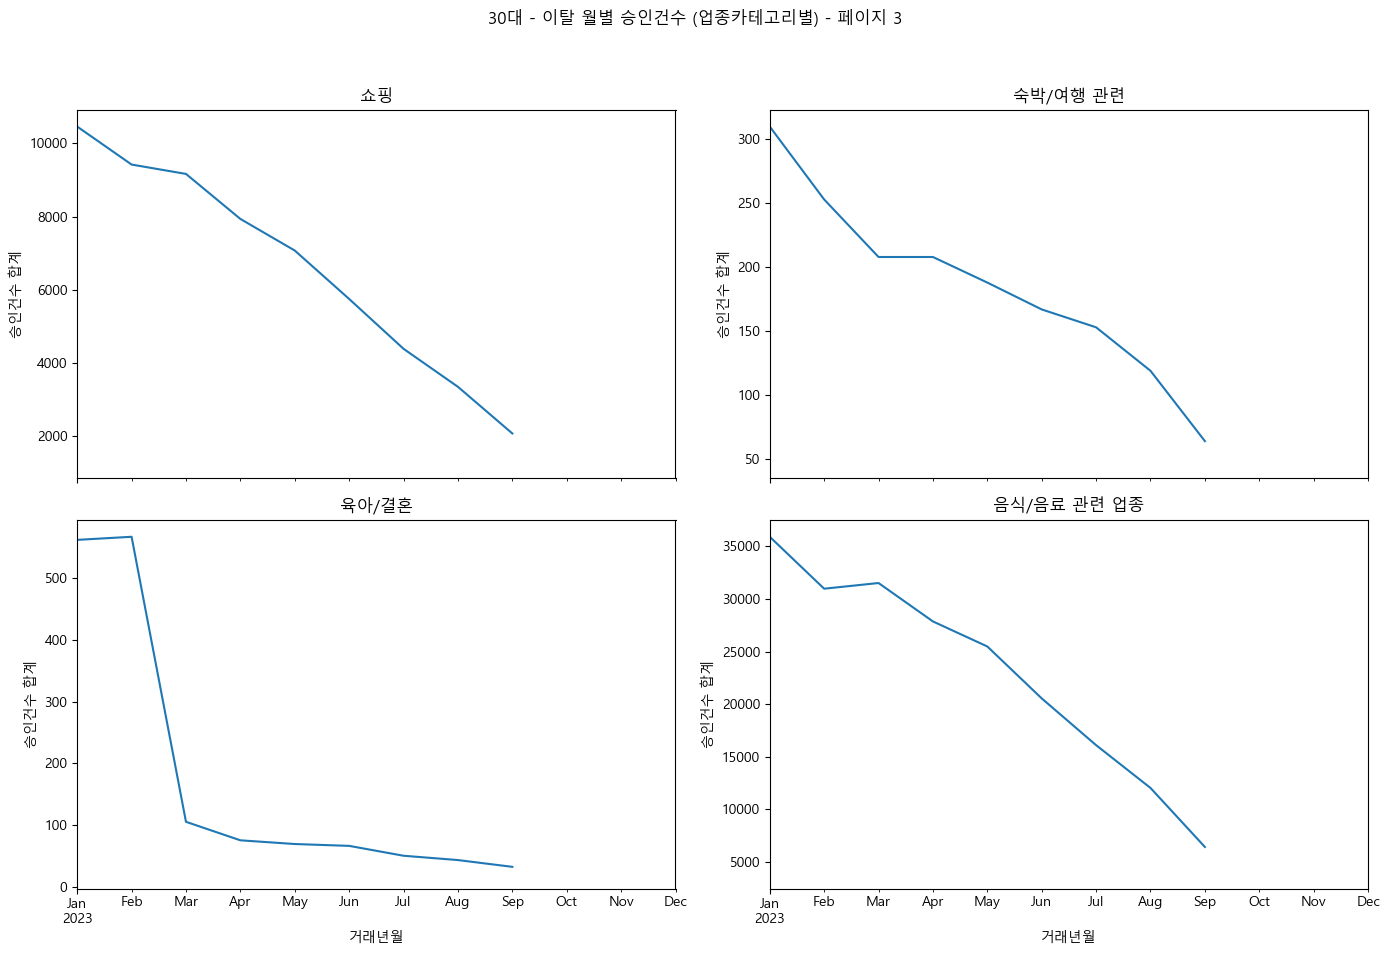

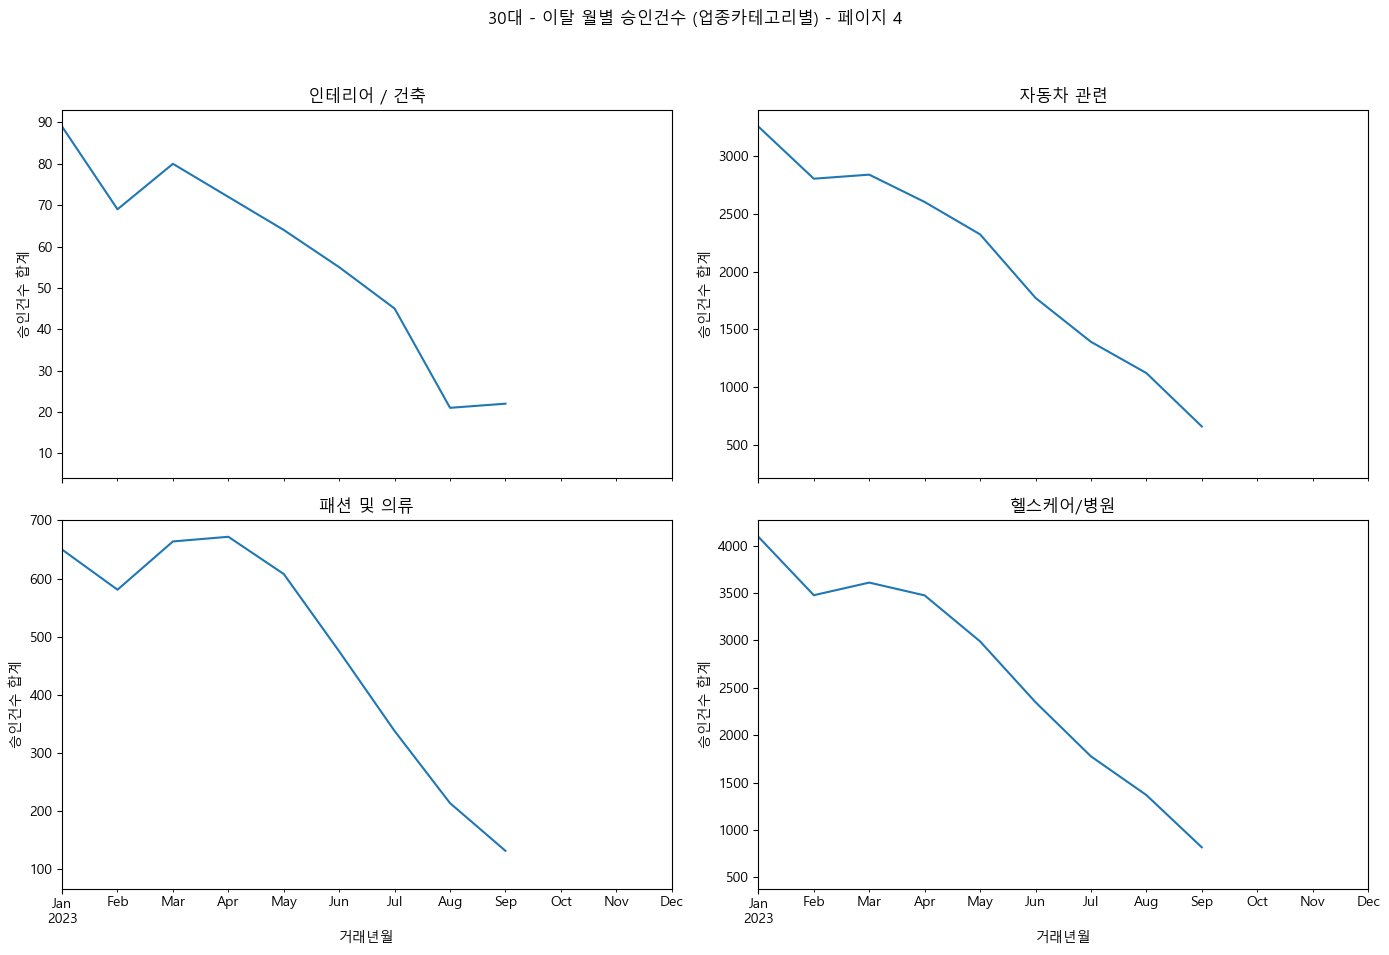

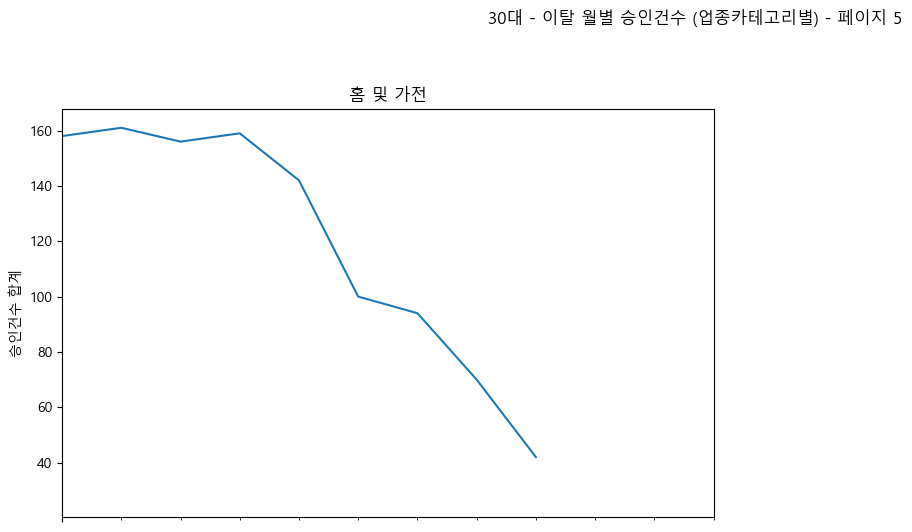

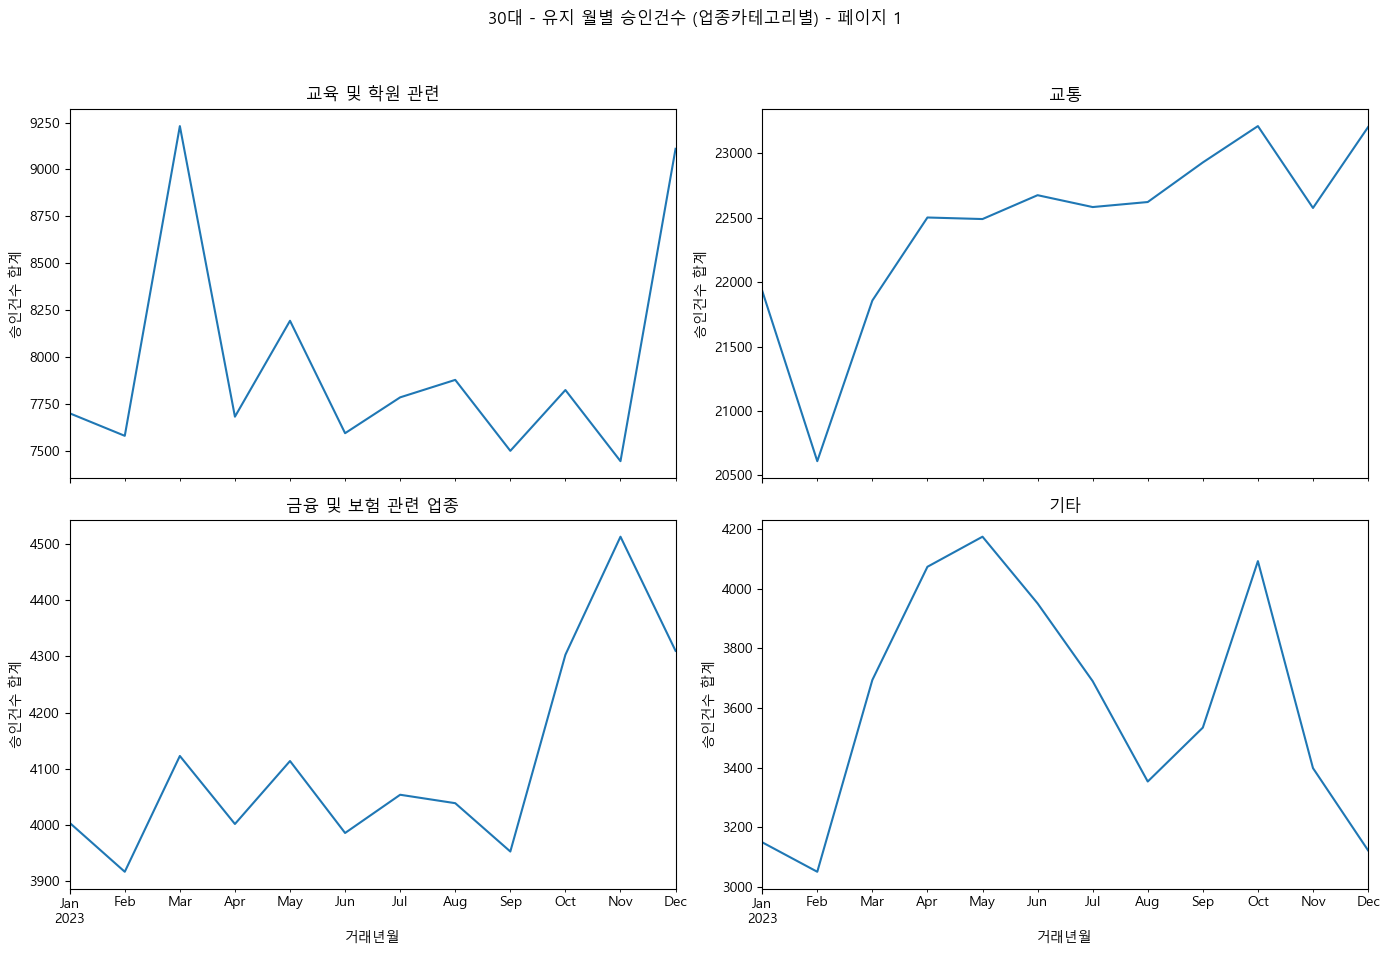

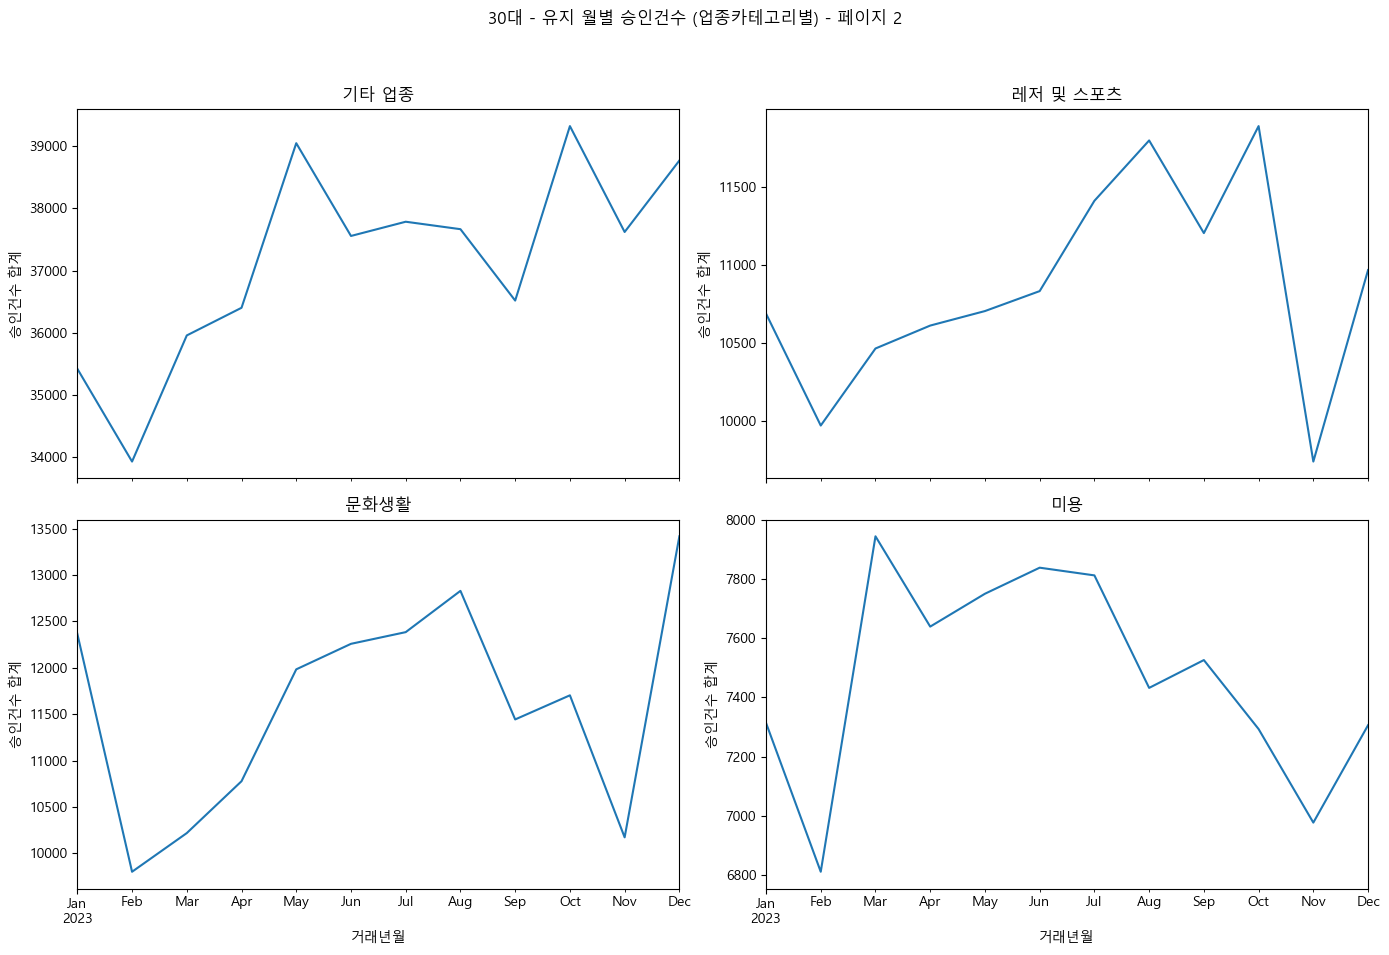

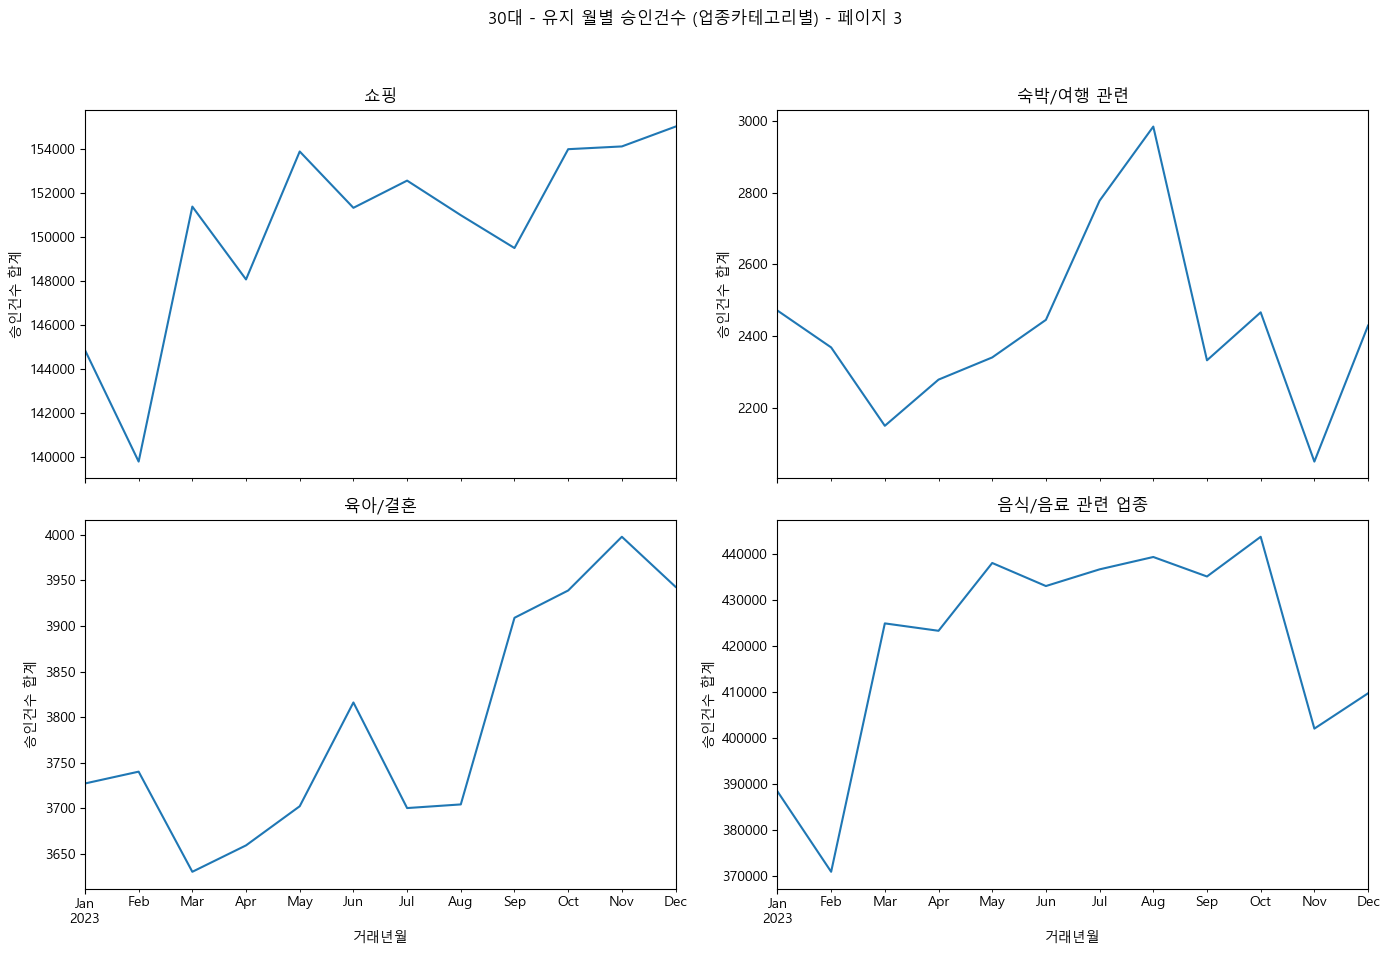

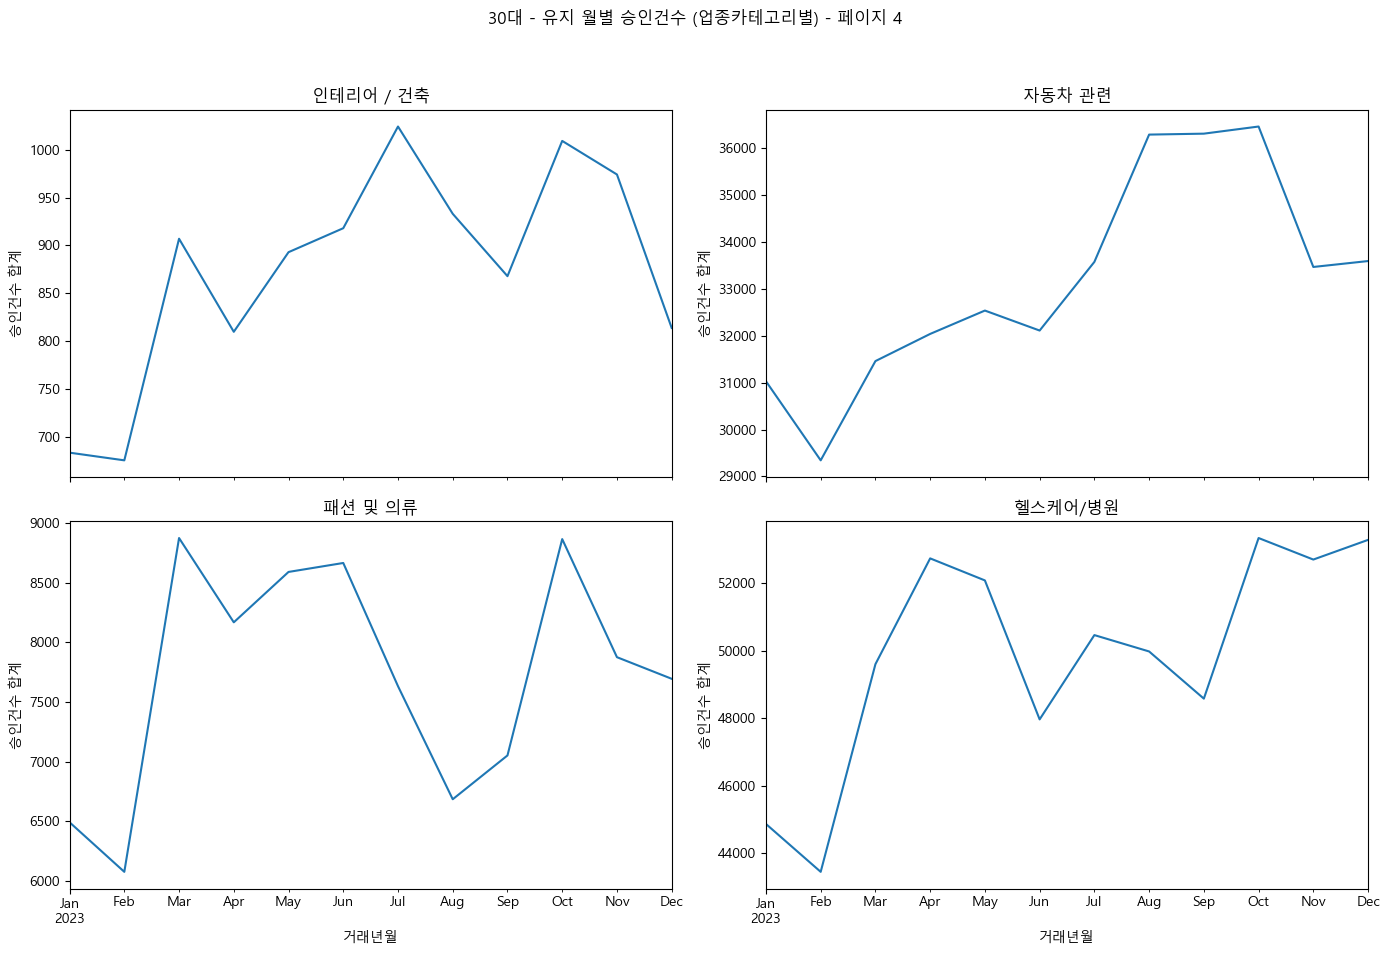

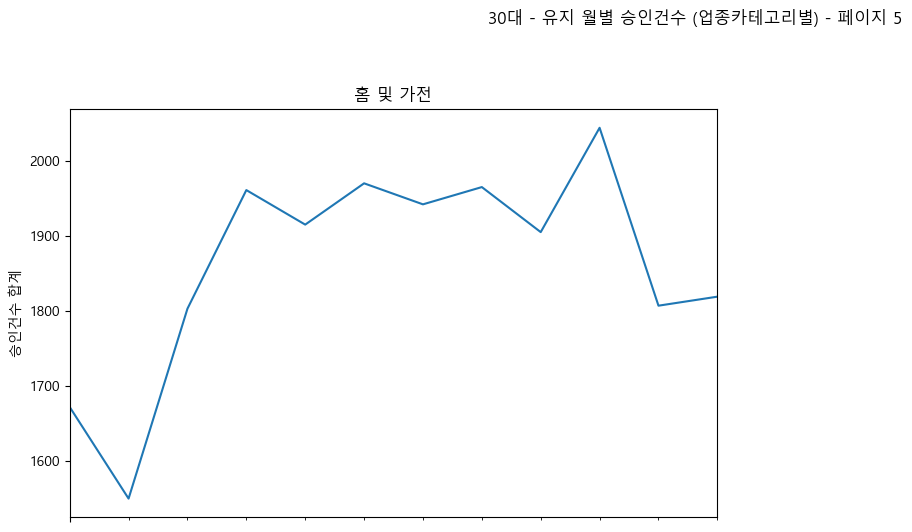

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import math

plt.rcParams['font.family'] = 'Malgun Gothic'

grouped_data = (
    filtered_df1.groupby(['거래년월', '연령대', '이탈여부', '업종카테고리'])['승인건수']
    .sum()
    .unstack(['연령대', '이탈여부', '업종카테고리'])
)

age_status_combinations = [('20대', '이탈'), ('20대', '유지'), ('30대', '이탈'), ('30대', '유지')]

for age, status in age_status_combinations:
    categories = grouped_data[age][status].columns  # 해당 조합의 업종카테고리
    num_categories = len(categories)
    plots_per_page = 4
    num_pages = math.ceil(num_categories / plots_per_page)

    for page in range(num_pages):
        fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
        fig.suptitle(f'{age} - {status} 월별 승인건수 (업종카테고리별) - 페이지 {page + 1}')
        
        start_idx = page * plots_per_page
        end_idx = min(start_idx + plots_per_page, num_categories)
        selected_categories = categories[start_idx:end_idx]
        
        for i, category in enumerate(selected_categories):
            row, col = divmod(i, 2)
            grouped_data[age][status][category].plot(ax=axes[row, col], title=category)
            axes[row, col].set_ylabel('승인건수 합계')
            axes[row, col].set_xlabel('거래년월')
        
        for j in range(len(selected_categories), plots_per_page):
            fig.delaxes(axes.flat[j])

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목 위치 확보
        plt.show()

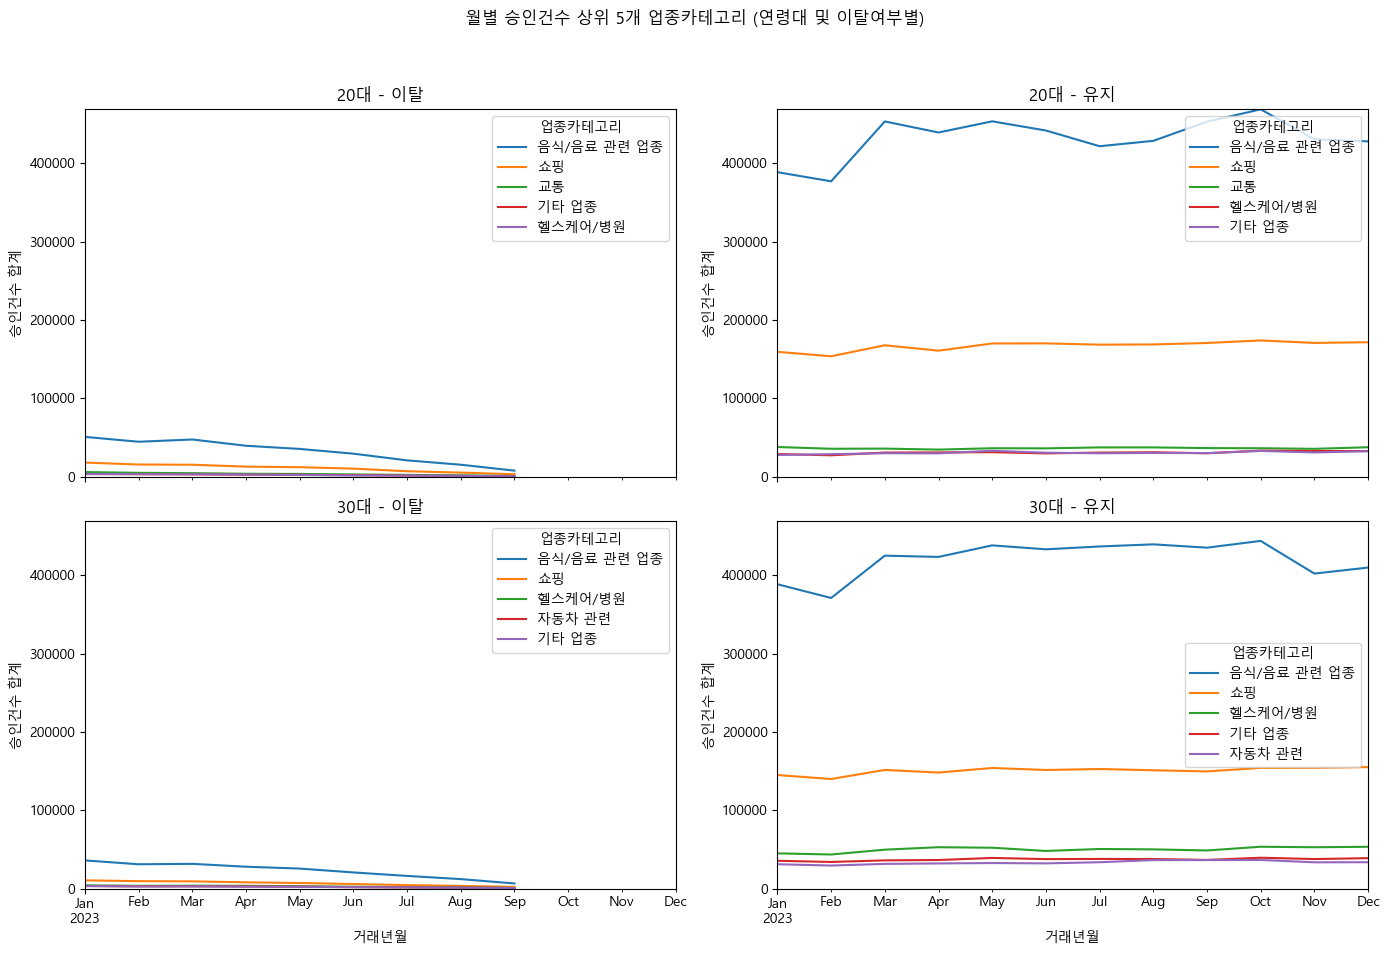

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.family'] = 'Malgun Gothic'

grouped_data = (
    filtered_df1.groupby(['거래년월', '연령대', '이탈여부', '업종카테고리'])['승인건수']
    .sum()
    .unstack(['연령대', '이탈여부', '업종카테고리'])
)

age_status_combinations = [('20대', '이탈'), ('20대', '유지'), ('30대', '이탈'), ('30대', '유지')]

y_max = 0
for age, status in age_status_combinations:
    category_sums = grouped_data[age][status].sum(axis=0).sort_values(ascending=False)
    top_5_categories = category_sums.head(5).index
    y_max = max(y_max, grouped_data[age][status][top_5_categories].max().max())

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
fig.suptitle('월별 승인건수 상위 5개 업종카테고리 (연령대 및 이탈여부별)')

for i, (age, status) in enumerate(age_status_combinations):
    row, col = divmod(i, 2)
    
    category_sums = grouped_data[age][status].sum(axis=0).sort_values(ascending=False)
    top_5_categories = category_sums.head(5).index
    
    grouped_data[age][status][top_5_categories].plot(ax=axes[row, col])
    axes[row, col].set_title(f'{age} - {status}')
    axes[row, col].set_ylim(0, y_max)  # y축 범위 고정
    axes[row, col].set_ylabel('승인건수 합계')
    axes[row, col].set_xlabel('거래년월')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목 위치 확보
plt.show()

In [28]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18363147 entries, 0 to 63332328
Data columns (total 7 columns):
 #   Column  Dtype    
---  ------  -----    
 0   거래년월    period[M]
 1   고객ID    int64    
 2   가맹점업종명  object   
 3   승인건수    int64    
 4   승인금액    int64    
 5   연령대     object   
 6   이탈여부    object   
dtypes: int64(3), object(3), period[M](1)
memory usage: 1.1+ GB


In [29]:
category_map1 = {
    # 음식/음료 관련 업종
    '음식/음료 관련 업종': [
        '슈퍼마켓', '스넥', '제과점', '서양음식', '정육점', '기타음료식품', '일반한식', '농·축·수산품', 
        '일식·회집', '중국식', '위탁급식업', '농협하나로클럽', '농축수산가공품', '연 쇄 점', '주류판매점', 
        '한정식', '갈비전문점', '편 의 점', '대형할인점', '구내매점(국가기관등)', '농,축협직영매장'
    ],

    # 쇼핑
    '쇼핑': [
        '인터넷Mall', '면 세 점', 'CATV홈쇼핑', '인터넷종합Mall', '전자상거래상품권전문판매', '상 품 권', 
        '일반(통신판매)', '기념품점', '유류판매', '인터넷P/G', 'PG상품권'
    ]
}

def categorize_business_type(business_name):
    for category, names in category_map1.items():
        if business_name in names:
            return category
    return None  # 지정된 카테고리에 해당하지 않는 경우 None 반환

# 업종카테고리 생성 및 필터링
filtered_df['업종카테고리'] = filtered_df['가맹점업종명'].apply(categorize_business_type)
filtered_df2 = filtered_df.copy()
filtered_df2 = filtered_df[filtered_df['업종카테고리'].notnull()]

C:\Users\dndtn\AppData\Local\Temp\ipykernel_2796\4044486669.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['업종카테고리'] = filtered_df['가맹점업종명'].apply(categorize_business_type)


In [30]:
filtered_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13547615 entries, 0 to 63332328
Data columns (total 8 columns):
 #   Column  Dtype    
---  ------  -----    
 0   거래년월    period[M]
 1   고객ID    int64    
 2   가맹점업종명  object   
 3   승인건수    int64    
 4   승인금액    int64    
 5   연령대     object   
 6   이탈여부    object   
 7   업종카테고리  object   
dtypes: int64(3), object(4), period[M](1)
memory usage: 930.2+ MB


In [31]:
unique_values = filtered_df2['업종카테고리'].unique()

In [32]:
unique_values

array(['음식/음료 관련 업종', '쇼핑'], dtype=object)

In [33]:
import pandas as pd

# 월별로 가맹점업종명, 업종카테고리, 연령대, 이탈여부별 승인건수 합계 계산
monthly_approval_counts = filtered_df2.pivot_table(
    index=['가맹점업종명', '업종카테고리', '연령대', '이탈여부'],
    columns='거래년월',
    values='승인건수',
    aggfunc='sum'
)

# 결과 표 시각화
monthly_approval_counts

거래년월                          2023-01  2023-02  2023-03  2023-04  2023-05  \
가맹점업종명  업종카테고리      연령대 이탈여부                                                
CATV홈쇼핑 쇼핑          20대 유지       42.0     34.0     38.0     34.0     28.0   
                        이탈        8.0      1.0      4.0      2.0      3.0   
                    30대 유지      141.0     96.0    114.0    129.0     94.0   
                        이탈        6.0      8.0      4.0      3.0      3.0   
PG상품권   쇼핑          20대 유지     4549.0   4634.0   5116.0   4761.0   4937.0   
...                               ...      ...      ...      ...      ...   
편 의 점   음식/음료 관련 업종 30대 이탈     7962.0   7076.0   7111.0   6363.0   5891.0   
한정식     음식/음료 관련 업종 20대 유지        NaN      NaN      NaN      NaN      NaN   
                        이탈        NaN      NaN      NaN      NaN      NaN   
                    30대 유지        NaN      NaN      NaN      NaN      NaN   
                        이탈        NaN      NaN      NaN      NaN      NaN   

거래년월                          2023-06  2023-07  2023-08  2023-09  2023-10  \
가맹점업종명  업종카테고리      연령대 이탈여부                                                
CATV홈쇼핑 쇼핑          20대 유지       33.0     34.0     42.0     27.0     29.0   
                        이탈        2.0      1.0      NaN      NaN      NaN   
                    30대 유지      120.0    116.0    128.0    108.0     96.0   
                        이탈        1.0      3.0      7.0      1.0      NaN   
PG상품권   쇼핑          20대 유지     4594.0   4385.0   4385.0   4527.0   4529.0   
...                               ...      ...      ...      ...      ...   
편 의 점   음식/음료 관련 업종 30대 이탈     4831.0   3779.0   2820.0   1488.0      NaN   
한정식     음식/음료 관련 업종 20대 유지       28.0     32.0     32.0      NaN      NaN   
                        이탈        2.0      2.0      1.0      NaN      NaN   
                    30대 유지       31.0     36.0     52.0      NaN      NaN   
                        이탈        1.0      NaN      2.0      NaN      NaN   

거래년월                          2023-11  2023-12  
가맹점업종명  업종카테고리      연령대 이탈여부                    
CATV홈쇼핑 쇼핑          20대 유지       35.0     32.0  
                        이탈        NaN      NaN  
                    30대 유지      111.0    125.0  
                        이탈        NaN      1.0  
PG상품권   쇼핑          20대 유지     4974.0   4574.0  
...                               ...      ...  
편 의 점   음식/음료 관련 업종 30대 이탈        NaN    757.0  
한정식     음식/음료 관련 업종 20대 유지        NaN      NaN  
                        이탈        NaN      NaN  
                    30대 유지        NaN      NaN  
                        이탈        NaN      NaN  

[128 rows x 12 columns]

In [34]:
import pandas as pd

monthly_approval_counts = filtered_df2.pivot_table(
    index=['가맹점업종명', '업종카테고리', '연령대', '이탈여부'],
    columns='거래년월',
    values='승인건수',
    aggfunc='sum'
)
sorted_df = monthly_approval_counts.copy()
sorted_df['12개월_평균'] = sorted_df.mean(axis=1)

# 인덱싱: 업종카테고리 > 가맹점업종명 > 연령대 > 이탈여부
sorted_df = sorted_df.reset_index().set_index(['업종카테고리', '가맹점업종명', '연령대', '이탈여부'])

# 12개월 평균값 기준으로 내림차순 정렬
grouped_sorted_dfs = []
for (age, churn), group_df in sorted_df.groupby(['연령대', '이탈여부']):
    group_df = group_df.sort_values(by='12개월_평균', ascending=False, key=lambda x: x.fillna(0))
    grouped_sorted_dfs.append(group_df)

final_sorted_df = pd.concat(grouped_sorted_dfs)
final_sorted_df = final_sorted_df.drop(columns=['12개월_평균'])

final_sorted_df.head(50)

거래년월                                2023-01   2023-02   2023-03   2023-04  \
업종카테고리      가맹점업종명       연령대 이탈여부                                           
음식/음료 관련 업종 편 의 점        20대 유지    100036.0   96401.0  119424.0  116678.0   
쇼핑          인터넷P/G       20대 유지    109185.0  103409.0  112771.0  105194.0   
음식/음료 관련 업종 서양음식         20대 유지     94004.0   92547.0  109191.0  106537.0   
            일반한식         20대 유지     83035.0   79473.0   94997.0   91488.0   
            슈퍼마켓         20대 유지     32646.0   31082.0   35397.0   34260.0   
쇼핑          인터넷Mall      20대 유지     29730.0   26869.0   28669.0   28111.0   
            인터넷종합Mall    20대 유지     14254.0   16930.0   19720.0   21404.0   
음식/음료 관련 업종 스넥           20대 유지     16444.0   15948.0   20405.0   19931.0   
            제과점          20대 유지     13131.0   13144.0   14709.0   14090.0   
            기타음료식품       20대 유지      8922.0    9002.0   10536.0   10638.0   
            대형할인점        20대 유지     10538.0    9696.0   10208.0    9488.0   
            중국식          20대 유지      8976.0    9043.0   10908.0   10122.0   
            일식·회집        20대 유지      8097.0    8113.0    9203.0    8546.0   
쇼핑          PG상품권        20대 유지      4549.0    4634.0    5116.0    4761.0   
음식/음료 관련 업종 정육점          20대 유지      3727.0    3559.0    4071.0    4119.0   
            위탁급식업        20대 유지      1398.0    1296.0    5601.0    4765.0   
            농·축·수산품      20대 유지      2926.0    2917.0    3222.0    2928.0   
            연 쇄 점        20대 유지      1811.0    1867.0    2134.0    2056.0   
            구내매점(국가기관등)  20대 유지      1514.0    1478.0    1952.0    2129.0   
            농,축협직영매장     20대 유지      1167.0    1182.0    1254.0    1328.0   
쇼핑          면 세 점        20대 유지       601.0     621.0     378.0     334.0   
            상 품 권        20대 유지       383.0     434.0     490.0     433.0   
            기념품점         20대 유지       486.0     520.0     335.0     329.0   
음식/음료 관련 업종 농협하나로클럽      20대 유지       236.0     210.0     217.0     189.0   
쇼핑          일반(통신판매)     20대 유지       198.0     268.0     290.0     246.0   
음식/음료 관련 업종 주류판매점        20대 유지       166.0     155.0     116.0     132.0   
쇼핑          전자상거래상품권전문판매 20대 유지        34.0      83.0      61.0      59.0   
            CATV홈쇼핑      20대 유지        42.0      34.0      38.0      34.0   
음식/음료 관련 업종 한정식          20대 유지         NaN       NaN       NaN       NaN   
            갈비전문점        20대 유지         NaN       NaN       NaN       NaN   
            농축수산가공품      20대 유지         9.0      11.0       9.0      14.0   
쇼핑          유류판매         20대 유지        26.0       8.0       8.0      11.0   
음식/음료 관련 업종 편 의 점        20대 이탈     13416.0   11683.0   12632.0   10710.0   
            서양음식         20대 이탈     11891.0   10489.0   11084.0    9325.0   
쇼핑          인터넷P/G       20대 이탈     11880.0   10067.0    9984.0    8152.0   
음식/음료 관련 업종 일반한식         20대 이탈     10707.0    9493.0   10125.0    8060.0   
            슈퍼마켓         20대 이탈      4471.0    3816.0    3988.0    3452.0   
쇼핑          인터넷Mall      20대 이탈      3821.0    3194.0    3040.0    2634.0   
음식/음료 관련 업종 스넥           20대 이탈      2121.0    1968.0    2069.0    1769.0   
쇼핑          인터넷종합Mall    20대 이탈      1508.0    1532.0    1555.0    1492.0   
음식/음료 관련 업종 제과점          20대 이탈      1600.0    1451.0    1391.0    1129.0   
            대형할인점        20대 이탈      1446.0    1204.0    1161.0     944.0   
            기타음료식품       20대 이탈      1177.0    1053.0    1054.0     883.0   
            중국식          20대 이탈      1222.0    1053.0    1149.0     947.0   
            일식·회집        20대 이탈      1069.0     943.0     911.0     709.0   
쇼핑          PG상품권        20대 이탈       627.0     499.0     502.0     447.0   
음식/음료 관련 업종 정육점          20대 이탈       507.0     469.0     464.0     383.0   
            농·축·수산품      20대 이탈       425.0     363.0     368.0     326.0   
            위탁급식업        20대 이탈       174.0     127.0     528.0     385.0   
            구내매점(국가기관등)  20대 이탈       239.0     233.0     286.0     243.0

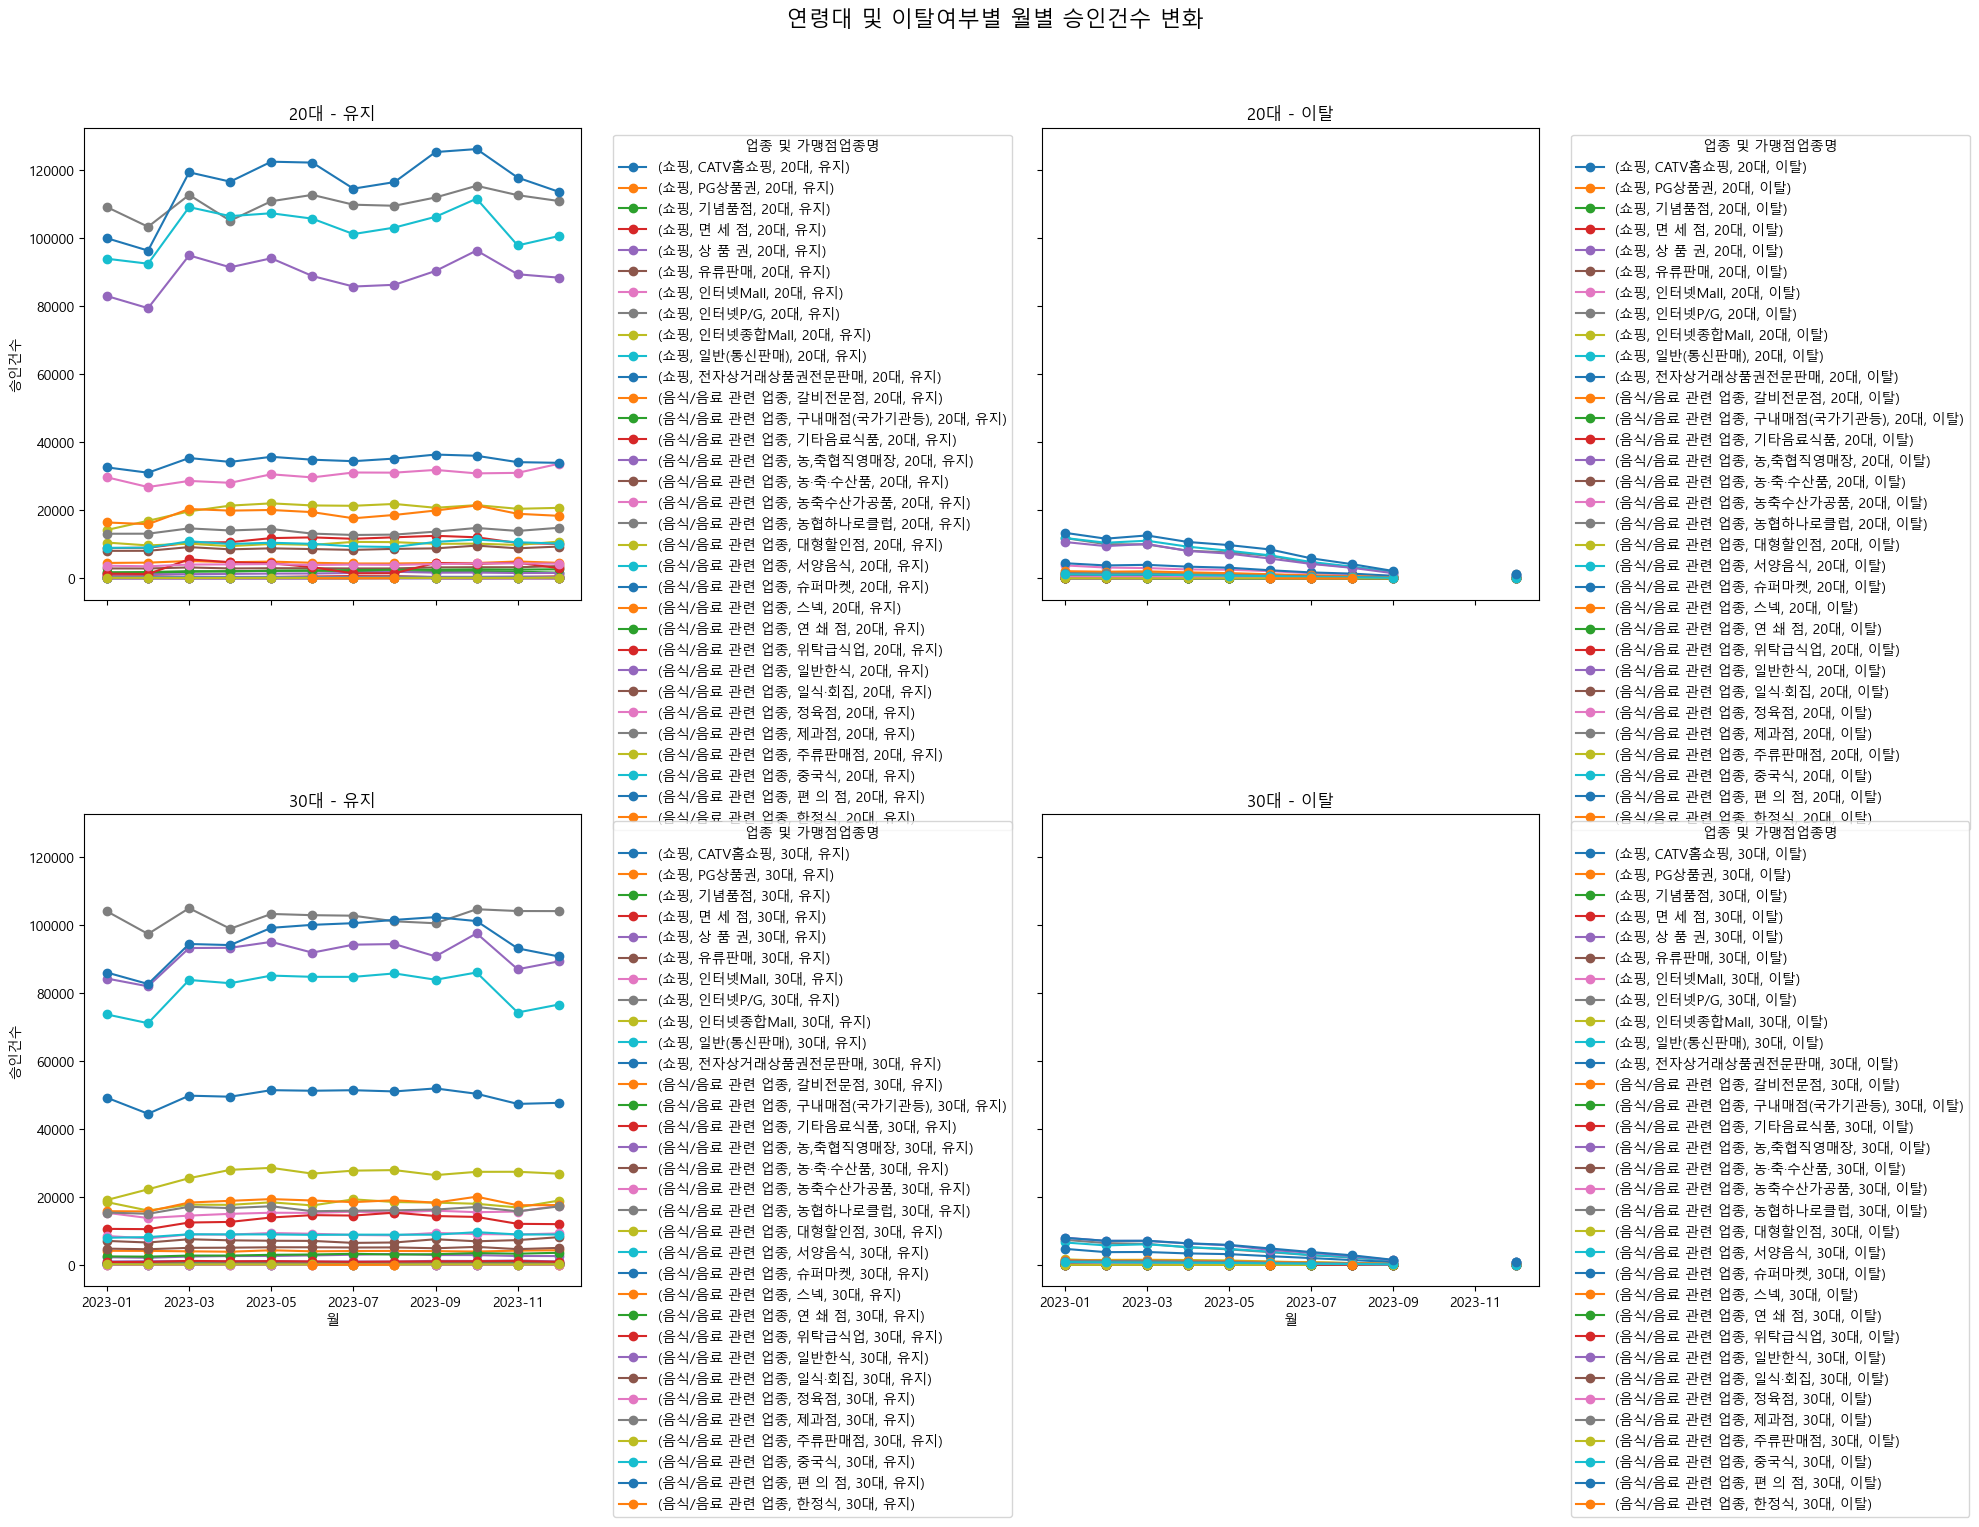

In [35]:
import matplotlib.pyplot as plt
final_sorted_df.columns = final_sorted_df.columns.astype(str)

fig, axes = plt.subplots(2, 2, figsize=(20, 15), sharex=True, sharey=True)
fig.suptitle('연령대 및 이탈여부별 월별 승인건수 변화', fontsize=16)

age_churn_combinations = [('20대', '유지'), ('20대', '이탈'), ('30대', '유지'), ('30대', '이탈')]

for (age, churn), ax in zip(age_churn_combinations, axes.flatten()):
    # 해당 조합의 데이터 필터링
    group_data = final_sorted_df.query("연령대 == @age & 이탈여부 == @churn")
    
    for (category, business), data in group_data.groupby(['업종카테고리', '가맹점업종명']):
        data.loc[:, '2023-01':'2023-12'].T.plot(
            ax=ax, 
            label=f'{category} - {business}', 
            marker='o'
        )
    
    churn_label = "유지" if churn == "유지" else "이탈"
    ax.set_title(f'{age} - {churn_label}')
    ax.set_xlabel('월')
    ax.set_ylabel('승인건수')
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="업종 및 가맹점업종명")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [41]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18363147 entries, 0 to 63332328
Data columns (total 8 columns):
 #   Column  Dtype    
---  ------  -----    
 0   거래년월    period[M]
 1   고객ID    int64    
 2   가맹점업종명  object   
 3   승인건수    int64    
 4   승인금액    int64    
 5   연령대     object   
 6   이탈여부    object   
 7   업종카테고리  object   
dtypes: int64(3), object(4), period[M](1)
memory usage: 1.2+ GB


In [55]:
filtered_df3 = (
    filtered_df.groupby(['거래년월', '연령대', '이탈여부', '가맹점업종명'], as_index=False)
    .agg({'승인건수': 'sum'})
    .sort_values(by=['거래년월', '연령대', '이탈여부', '승인건수'], ascending=[True, True, True, False])
)

In [56]:
filtered_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8447 entries, 129 to 8443
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype    
---  ------  --------------  -----    
 0   거래년월    8447 non-null   period[M]
 1   연령대     8447 non-null   object   
 2   이탈여부    8447 non-null   object   
 3   가맹점업종명  8447 non-null   object   
 4   승인건수    8447 non-null   int64    
dtypes: int64(1), object(3), period[M](1)
memory usage: 396.0+ KB


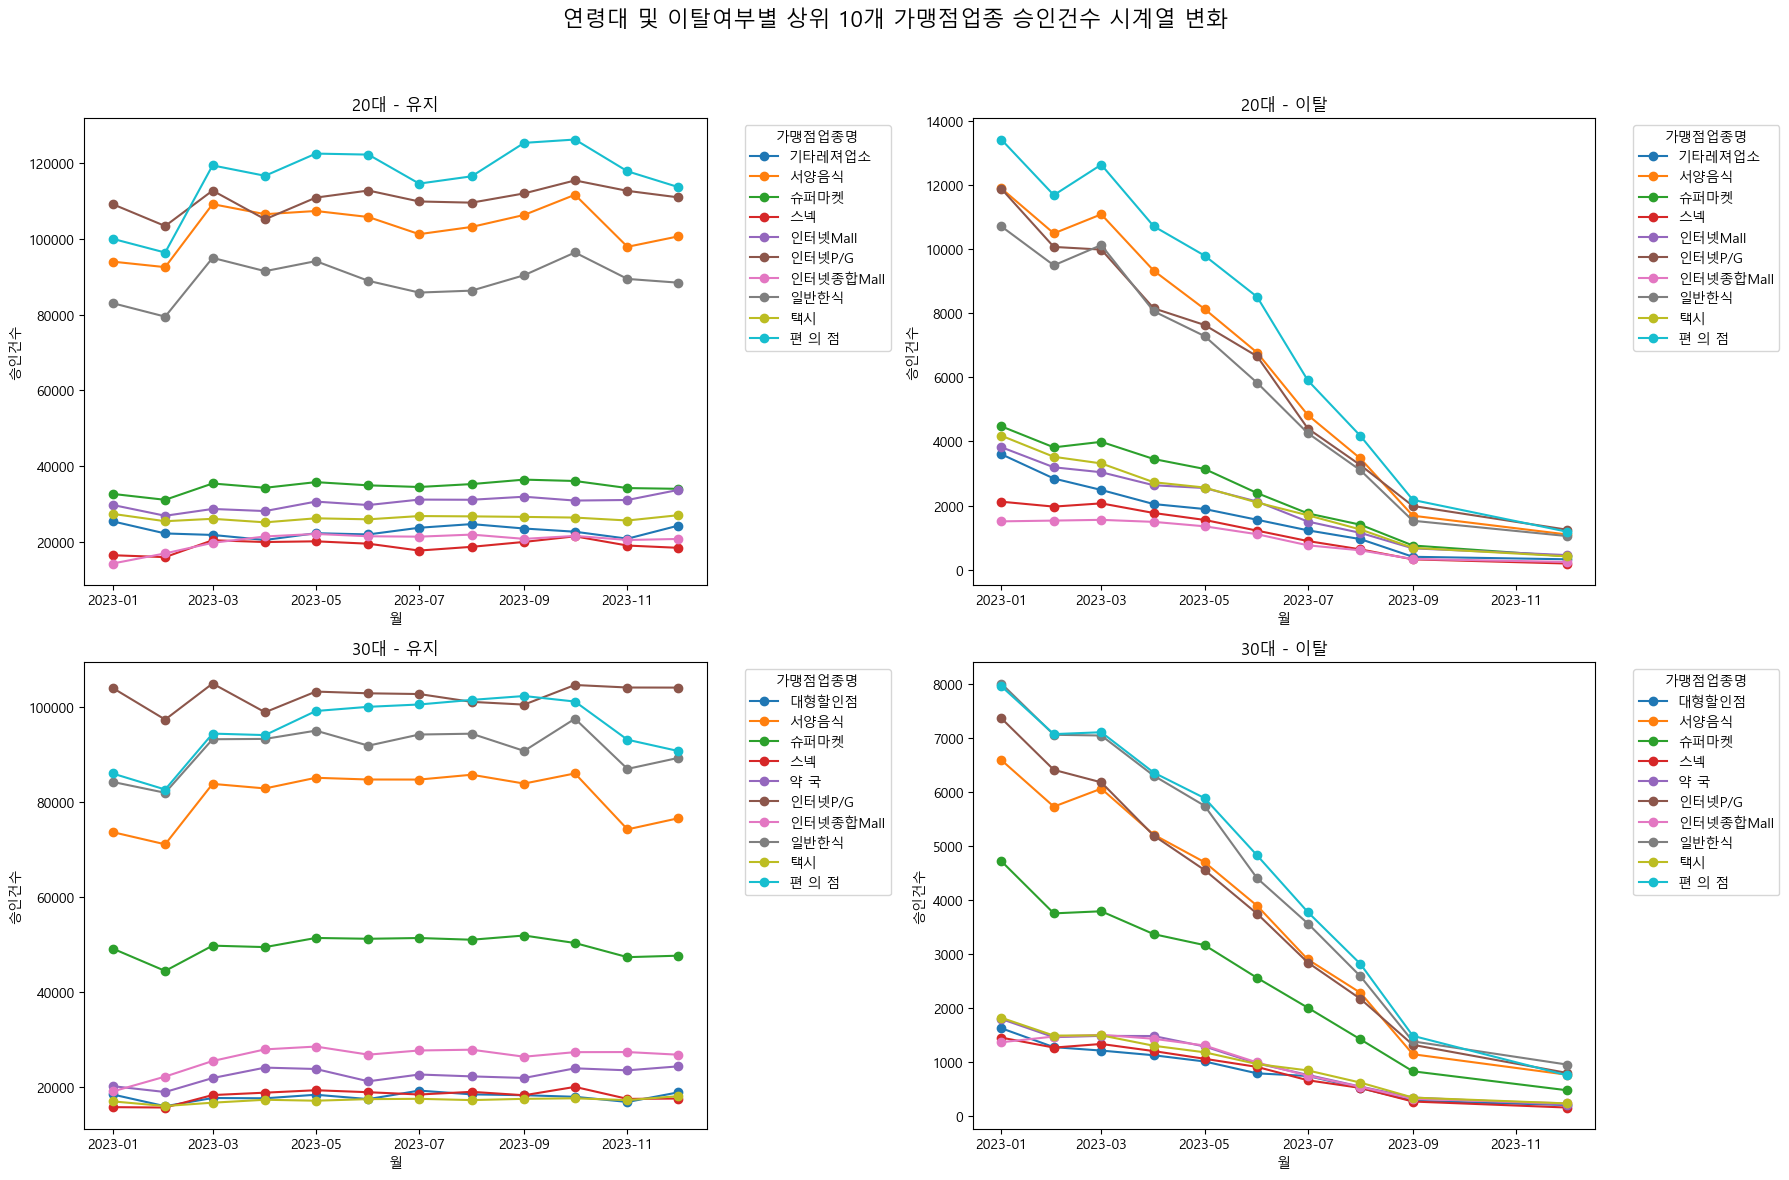

In [57]:
import matplotlib.pyplot as plt

# 거래년월을 datetime으로 변환
filtered_df3['거래년월'] = filtered_df3['거래년월'].dt.to_timestamp()

# 각 연령대와 이탈여부 조합을 리스트로 생성
age_churn_combinations = filtered_df3.groupby(['연령대', '이탈여부'])

# 시각화 설정
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('연령대 및 이탈여부별 상위 10개 가맹점업종 승인건수 시계열 변화', fontsize=16)

# 각 연령대와 이탈여부 조합별로 상위 10개의 가맹점업종명 시각화
for (age, churn), ax in zip(age_churn_combinations.groups.keys(), axes.flatten()):
    # 해당 조합의 데이터 필터링
    group_data = filtered_df3.query("연령대 == @age & 이탈여부 == @churn")
    
    # 승인건수 상위 10개의 가맹점업종명 추출
    top_10_businesses = group_data.groupby('가맹점업종명')['승인건수'].sum().nlargest(10).index
    top_10_data = group_data[group_data['가맹점업종명'].isin(top_10_businesses)]
    
    # 상위 10개의 가맹점업종명에 대한 시계열 그래프 생성
    for business, data in top_10_data.groupby('가맹점업종명'):
        ax.plot(data['거래년월'], data['승인건수'], label=business, marker='o')
    
    # 그래프 제목 및 라벨 설정
    churn_label = "유지" if churn == "유지" else "이탈"
    ax.set_title(f'{age} - {churn_label}')
    ax.set_xlabel('월')
    ax.set_ylabel('승인건수')
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="가맹점업종명")

# 레이아웃 조정
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [61]:
# 연령대와 이탈여부별로 데이터 나누기
age_20_keep = (
    filtered_df3.query("연령대 == '20대' & 이탈여부 == '유지'")
    .sort_values(by='승인건수', ascending=False)
)

age_20_churn = (
    filtered_df3.query("연령대 == '20대' & 이탈여부 == '이탈'")
    .sort_values(by='승인건수', ascending=False)
)

age_30_keep = (
    filtered_df3.query("연령대 == '30대' & 이탈여부 == '유지'")
    .sort_values(by='승인건수', ascending=False)
)

age_30_churn = (
    filtered_df3.query("연령대 == '30대' & 이탈여부 == '이탈'")
    .sort_values(by='승인건수', ascending=False)
)

In [68]:
age_20_keep.head()

,거래년월,연령대,이탈여부,가맹점업종명,승인건수
7137,2023-10-01,20대,유지,편 의 점,126258
6387,2023-09-01,20대,유지,편 의 점,125378
3287,2023-05-01,20대,유지,편 의 점,122543
4073,2023-06-01,20대,유지,편 의 점,122277
1713,2023-03-01,20대,유지,편 의 점,119424


In [83]:
pivot_20_keep = age_20_keep.pivot_table(index='가맹점업종명', columns='거래년월', values='승인건수', aggfunc='sum').fillna(0)
pivot_20_keep.columns = pivot_20_keep.columns.strftime('%Y-%m')  # '거래년월'을 'YYYY-MM' 형식으로 변환
pivot_20_keep['12개월_평균'] = pivot_20_keep.mean(axis=1)
pivot_20_keep = pivot_20_keep.sort_values(by='12개월_평균', ascending=False)
pivot_20_keep = pivot_20_keep.drop(columns=['12개월_평균'])

pivot_20_keep.head(20)

거래년월,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
가맹점업종명,,,,,,,,,,,,
편 의 점,100036.0,96401.0,119424.0,116678.0,122543.0,122277.0,114614.0,116544.0,125378.0,126258.0,117867.0,113697.0
인터넷P/G,109185.0,103409.0,112771.0,105194.0,110916.0,112788.0,109897.0,109584.0,112027.0,115457.0,112699.0,110982.0
서양음식,94004.0,92547.0,109191.0,106537.0,107380.0,105794.0,101260.0,103170.0,106339.0,111666.0,97918.0,100677.0
일반한식,83035.0,79473.0,94997.0,91488.0,94139.0,88932.0,85832.0,86342.0,90413.0,96420.0,89436.0,88447.0
슈퍼마켓,32646.0,31082.0,35397.0,34260.0,35755.0,34907.0,34471.0,35240.0,36417.0,36056.0,34186.0,33987.0
인터넷Mall,29730.0,26869.0,28669.0,28111.0,30613.0,29702.0,31141.0,31098.0,31902.0,30884.0,31039.0,33698.0
택시,27372.0,25429.0,26068.0,25130.0,26200.0,25931.0,26792.0,26709.0,26570.0,26393.0,25619.0,27017.0
기타레져업소,25398.0,22200.0,21804.0,20472.0,22263.0,21942.0,23702.0,24669.0,23502.0,22655.0,20812.0,24265.0
인터넷종합Mall,14254.0,16930.0,19720.0,21404.0,22068.0,21454.0,21350.0,21895.0,20767.0,21545.0,20471.0,20743.0


In [84]:
pivot_20_churn = age_20_churn.pivot_table(index='가맹점업종명', columns='거래년월', values='승인건수', aggfunc='sum').fillna(0)
pivot_20_churn.columns = pivot_20_churn.columns.strftime('%Y-%m')  # '거래년월'을 'YYYY-MM' 형식으로 변환
pivot_20_churn['12개월_평균'] = pivot_20_churn.mean(axis=1)
pivot_20_churn = pivot_20_churn.sort_values(by='12개월_평균', ascending=False)
pivot_20_churn = pivot_20_churn.drop(columns=['12개월_평균'])

pivot_20_churn.head(20)

거래년월,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-12
가맹점업종명,,,,,,,,,,
편 의 점,13416.0,11683.0,12632.0,10710.0,9796.0,8511.0,5902.0,4175.0,2177.0,1186.0
서양음식,11891.0,10489.0,11084.0,9325.0,8131.0,6773.0,4823.0,3469.0,1684.0,1099.0
인터넷P/G,11880.0,10067.0,9984.0,8152.0,7633.0,6657.0,4403.0,3263.0,1988.0,1248.0
일반한식,10707.0,9493.0,10125.0,8060.0,7286.0,5832.0,4258.0,3103.0,1527.0,1050.0
슈퍼마켓,4471.0,3816.0,3988.0,3452.0,3142.0,2391.0,1756.0,1404.0,755.0,419.0
택시,4179.0,3521.0,3315.0,2728.0,2563.0,2095.0,1698.0,1255.0,683.0,417.0
인터넷Mall,3821.0,3194.0,3040.0,2634.0,2547.0,2126.0,1501.0,1149.0,666.0,456.0
기타레져업소,3601.0,2844.0,2487.0,2047.0,1893.0,1558.0,1228.0,955.0,403.0,325.0
스넥,2121.0,1968.0,2069.0,1769.0,1553.0,1219.0,894.0,635.0,323.0,193.0


In [85]:
pivot_30_keep = age_30_keep.pivot_table(index='가맹점업종명', columns='거래년월', values='승인건수', aggfunc='sum').fillna(0)
pivot_30_keep.columns = pivot_30_keep.columns.strftime('%Y-%m')  # '거래년월'을 'YYYY-MM' 형식으로 변환
pivot_30_keep['12개월_평균'] = pivot_20_keep.mean(axis=1)
pivot_30_keep = pivot_30_keep.sort_values(by='12개월_평균', ascending=False)
pivot_30_keep = pivot_30_keep.drop(columns=['12개월_평균'])

pivot_30_keep.head(20)

거래년월,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
가맹점업종명,,,,,,,,,,,,
편 의 점,85979.0,82607.0,94368.0,94056.0,99123.0,100003.0,100493.0,101457.0,102276.0,101110.0,93082.0,90706.0
인터넷P/G,103972.0,97322.0,104901.0,98857.0,103208.0,102844.0,102692.0,101043.0,100469.0,104593.0,104064.0,104045.0
서양음식,73647.0,71081.0,83795.0,82836.0,85077.0,84714.0,84702.0,85717.0,83860.0,85993.0,74224.0,76563.0
일반한식,84209.0,81920.0,93182.0,93254.0,94991.0,91832.0,94175.0,94349.0,90727.0,97500.0,86944.0,89259.0
슈퍼마켓,49155.0,44448.0,49766.0,49462.0,51386.0,51213.0,51372.0,51012.0,51899.0,50324.0,47346.0,47656.0
인터넷Mall,15319.0,13788.0,14493.0,15015.0,15342.0,15285.0,15644.0,15408.0,15943.0,15502.0,15685.0,17400.0
택시,17012.0,16031.0,16736.0,17351.0,17151.0,17485.0,17547.0,17281.0,17545.0,17656.0,17275.0,18113.0
기타레져업소,8273.0,7157.0,6886.0,7052.0,7221.0,7459.0,8440.0,8722.0,7795.0,7917.0,6795.0,8198.0
인터넷종합Mall,19093.0,22227.0,25500.0,27951.0,28540.0,26841.0,27717.0,27880.0,26406.0,27367.0,27386.0,26829.0


In [86]:
pivot_30_churn = age_30_churn.pivot_table(index='가맹점업종명', columns='거래년월', values='승인건수', aggfunc='sum').fillna(0)
pivot_30_churn.columns = pivot_30_churn.columns.strftime('%Y-%m')  # '거래년월'을 'YYYY-MM' 형식으로 변환
pivot_30_churn['12개월_평균'] = pivot_30_churn.mean(axis=1)
pivot_30_churn = pivot_30_churn.sort_values(by='12개월_평균', ascending=False)
pivot_30_churn = pivot_30_churn.drop(columns=['12개월_평균'])

pivot_30_churn.head(20)

거래년월,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-12
가맹점업종명,,,,,,,,,,
편 의 점,7962.0,7076.0,7111.0,6363.0,5891.0,4831.0,3779.0,2820.0,1488.0,757.0
일반한식,8013.0,7064.0,7050.0,6306.0,5749.0,4408.0,3568.0,2592.0,1385.0,956.0
인터넷P/G,7369.0,6414.0,6183.0,5196.0,4559.0,3751.0,2845.0,2174.0,1321.0,801.0
서양음식,6595.0,5733.0,6066.0,5214.0,4704.0,3898.0,2902.0,2286.0,1147.0,768.0
슈퍼마켓,4723.0,3756.0,3795.0,3371.0,3168.0,2562.0,2008.0,1423.0,831.0,480.0
약 국,1799.0,1463.0,1487.0,1484.0,1291.0,977.0,764.0,548.0,345.0,212.0
택시,1822.0,1492.0,1497.0,1304.0,1183.0,965.0,847.0,622.0,344.0,236.0
인터넷종합Mall,1369.0,1475.0,1507.0,1433.0,1309.0,995.0,747.0,543.0,320.0,237.0
스넥,1455.0,1270.0,1337.0,1205.0,1063.0,912.0,665.0,523.0,271.0,160.0


In [99]:
import pandas as pd

def create_rank_table(group_df, group_name):
    pivot_table = group_df.pivot_table(index='가맹점업종명', columns='거래년월', values='승인건수', aggfunc='sum').fillna(0)
    pivot_table.columns = pivot_table.columns.strftime('%Y-%m')  # 거래년월을 'YYYY-MM' 형식으로 변환
    
    # 12개월 평균 계산 후 상위 20개 추출
    pivot_table['12개월_평균'] = pivot_table.mean(axis=1)
    top_20_table = pivot_table.sort_values(by='12개월_평균', ascending=False).head(20).drop(columns=['12개월_평균'])
    
    # 월별로 `가맹점업종명`을 순위 값
    rank_table = top_20_table.apply(lambda x: x.sort_values(ascending=False).index, axis=0)
    rank_table = rank_table.apply(lambda col: col.rename(None)).reset_index(drop=True)  # 인덱스를 순위로 재설정
    
    # 순위 및 그룹 열 추가
    rank_table.insert(0, '순위', range(1, 21))  # 순위 열 추가
    rank_table.insert(0, '그룹', group_name)  # 그룹 이름을 가장 왼쪽에 추가
    return rank_table

rank_age_20_keep = create_rank_table(age_20_keep, '20대-유지')
rank_age_20_churn = create_rank_table(age_20_churn, '20대-이탈')
rank_age_30_keep = create_rank_table(age_30_keep, '30대-유지')
rank_age_30_churn = create_rank_table(age_30_churn, '30대-이탈')

comparison_rank_table = pd.concat([rank_age_20_keep, rank_age_20_churn, rank_age_30_keep, rank_age_30_churn], ignore_index=True)

comparison_rank_table

거래년월,그룹,순위,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
0,20대-유지,1,인터넷P/G,인터넷P/G,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점
1,20대-유지,2,편 의 점,편 의 점,인터넷P/G,서양음식,인터넷P/G,인터넷P/G,인터넷P/G,인터넷P/G,인터넷P/G,인터넷P/G,인터넷P/G,인터넷P/G
2,20대-유지,3,서양음식,서양음식,서양음식,인터넷P/G,서양음식,서양음식,서양음식,서양음식,서양음식,서양음식,서양음식,서양음식
3,20대-유지,4,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식
4,20대-유지,5,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,30대-이탈,16,중국식,중국식,중국식,중국식,중국식,중국식,중국식,중국식,기타 전문점,NaN,NaN,정육점
76,30대-이탈,17,정육점,기타레져업소,정육점,정육점,정육점,정육점,정육점,주유소,중국식,NaN,NaN,기타음료식품
77,30대-이탈,18,기타레져업소,정육점,기타레져업소,기타레져업소,주유소,주유소,주유소,정육점,정육점,NaN,NaN,기타 전문점
78,30대-이탈,19,주유소,주유소,주유소,주유소,기타레져업소,기타 전문점,기타 전문점,기타 전문점,주유소,NaN,NaN,기타레져업소


In [101]:
group_1 = comparison_rank_table.iloc[0:20]    # 20대-유지
group_2 = comparison_rank_table.iloc[20:40]   # 20대-이탈
group_3 = comparison_rank_table.iloc[40:60]   # 30대-유지
group_4 = comparison_rank_table.iloc[60:80]   # 30대-이탈

In [102]:
group_1

거래년월,그룹,순위,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
0,20대-유지,1,인터넷P/G,인터넷P/G,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점
1,20대-유지,2,편 의 점,편 의 점,인터넷P/G,서양음식,인터넷P/G,인터넷P/G,인터넷P/G,인터넷P/G,인터넷P/G,인터넷P/G,인터넷P/G,인터넷P/G
2,20대-유지,3,서양음식,서양음식,서양음식,인터넷P/G,서양음식,서양음식,서양음식,서양음식,서양음식,서양음식,서양음식,서양음식
3,20대-유지,4,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식
4,20대-유지,5,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓
5,20대-유지,6,인터넷Mall,인터넷Mall,인터넷Mall,인터넷Mall,인터넷Mall,인터넷Mall,인터넷Mall,인터넷Mall,인터넷Mall,인터넷Mall,인터넷Mall,인터넷Mall
6,20대-유지,7,택시,택시,택시,택시,택시,택시,택시,택시,택시,택시,택시,택시
7,20대-유지,8,기타레져업소,기타레져업소,기타레져업소,인터넷종합Mall,기타레져업소,기타레져업소,기타레져업소,기타레져업소,기타레져업소,기타레져업소,기타레져업소,기타레져업소
8,20대-유지,9,스넥,인터넷종합Mall,스넥,기타레져업소,인터넷종합Mall,인터넷종합Mall,인터넷종합Mall,인터넷종합Mall,인터넷종합Mall,인터넷종합Mall,인터넷종합Mall,인터넷종합Mall
9,20대-유지,10,인터넷종합Mall,스넥,인터넷종합Mall,스넥,스넥,스넥,스넥,스넥,스넥,스넥,스넥,스넥


In [103]:
group_2

거래년월,그룹,순위,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
20,20대-이탈,1,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점,NaN,NaN,인터넷P/G
21,20대-이탈,2,서양음식,서양음식,서양음식,서양음식,서양음식,서양음식,서양음식,서양음식,인터넷P/G,NaN,NaN,편 의 점
22,20대-이탈,3,인터넷P/G,인터넷P/G,일반한식,인터넷P/G,인터넷P/G,인터넷P/G,인터넷P/G,인터넷P/G,서양음식,NaN,NaN,서양음식
23,20대-이탈,4,일반한식,일반한식,인터넷P/G,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식,NaN,NaN,일반한식
24,20대-이탈,5,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,NaN,NaN,인터넷Mall
25,20대-이탈,6,택시,택시,택시,택시,택시,인터넷Mall,택시,택시,택시,NaN,NaN,슈퍼마켓
26,20대-이탈,7,인터넷Mall,인터넷Mall,인터넷Mall,인터넷Mall,인터넷Mall,택시,인터넷Mall,인터넷Mall,인터넷Mall,NaN,NaN,택시
27,20대-이탈,8,기타레져업소,기타레져업소,기타레져업소,기타레져업소,기타레져업소,기타레져업소,기타레져업소,기타레져업소,기타레져업소,NaN,NaN,기타레져업소
28,20대-이탈,9,스넥,스넥,스넥,스넥,스넥,스넥,스넥,스넥,인터넷종합Mall,NaN,NaN,인터넷종합Mall
29,20대-이탈,10,제과점,인터넷종합Mall,인터넷종합Mall,인터넷종합Mall,인터넷종합Mall,인터넷종합Mall,인터넷종합Mall,인터넷종합Mall,스넥,NaN,NaN,스넥


In [104]:
group_3

거래년월,그룹,순위,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
40,30대-유지,1,인터넷P/G,인터넷P/G,인터넷P/G,인터넷P/G,인터넷P/G,인터넷P/G,인터넷P/G,편 의 점,편 의 점,인터넷P/G,인터넷P/G,인터넷P/G
41,30대-유지,2,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점,인터넷P/G,인터넷P/G,편 의 점,편 의 점,편 의 점
42,30대-유지,3,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식
43,30대-유지,4,서양음식,서양음식,서양음식,서양음식,서양음식,서양음식,서양음식,서양음식,서양음식,서양음식,서양음식,서양음식
44,30대-유지,5,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓
45,30대-유지,6,약 국,인터넷종합Mall,인터넷종합Mall,인터넷종합Mall,인터넷종합Mall,인터넷종합Mall,인터넷종합Mall,인터넷종합Mall,인터넷종합Mall,인터넷종합Mall,인터넷종합Mall,인터넷종합Mall
46,30대-유지,7,인터넷종합Mall,약 국,약 국,약 국,약 국,약 국,약 국,약 국,약 국,약 국,약 국,약 국
47,30대-유지,8,대형할인점,택시,스넥,스넥,스넥,스넥,대형할인점,스넥,대형할인점,스넥,스넥,대형할인점
48,30대-유지,9,택시,대형할인점,대형할인점,대형할인점,대형할인점,대형할인점,스넥,대형할인점,스넥,대형할인점,택시,택시
49,30대-유지,10,스넥,스넥,제과점,택시,제과점,택시,택시,택시,택시,택시,의 원,스넥


In [105]:
group_4

거래년월,그룹,순위,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
60,30대-이탈,1,일반한식,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점,편 의 점,NaN,NaN,일반한식
61,30대-이탈,2,편 의 점,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식,일반한식,NaN,NaN,인터넷P/G
62,30대-이탈,3,인터넷P/G,인터넷P/G,인터넷P/G,서양음식,서양음식,서양음식,서양음식,서양음식,인터넷P/G,NaN,NaN,서양음식
63,30대-이탈,4,서양음식,서양음식,서양음식,인터넷P/G,인터넷P/G,인터넷P/G,인터넷P/G,인터넷P/G,서양음식,NaN,NaN,편 의 점
64,30대-이탈,5,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,슈퍼마켓,NaN,NaN,슈퍼마켓
65,30대-이탈,6,택시,택시,인터넷종합Mall,약 국,인터넷종합Mall,인터넷종합Mall,택시,택시,약 국,NaN,NaN,인터넷종합Mall
66,30대-이탈,7,약 국,인터넷종합Mall,택시,인터넷종합Mall,약 국,약 국,약 국,약 국,택시,NaN,NaN,택시
67,30대-이탈,8,대형할인점,약 국,약 국,택시,택시,택시,인터넷종합Mall,인터넷종합Mall,인터넷종합Mall,NaN,NaN,약 국
68,30대-이탈,9,스넥,대형할인점,스넥,스넥,스넥,스넥,대형할인점,스넥,대형할인점,NaN,NaN,대형할인점
69,30대-이탈,10,인터넷종합Mall,스넥,대형할인점,대형할인점,대형할인점,대형할인점,스넥,대형할인점,스넥,NaN,NaN,제과점


In [106]:
filtered_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8447 entries, 129 to 8443
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   거래년월    8447 non-null   datetime64[ns]
 1   연령대     8447 non-null   object        
 2   이탈여부    8447 non-null   object        
 3   가맹점업종명  8447 non-null   object        
 4   승인건수    8447 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 396.0+ KB
